In [1]:
import pickle
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ray
import scipy
import scipy.sparse as sparse
import sklearn
from numpy import array, count_nonzero
from scipy.stats import ranksums
from sklearn.preprocessing import normalize


In [3]:
region_bin_topics_otsu=pickle.load(open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/region_bin_topics_otsu.pkl', 'rb'))
region_bin_topics_top3k=pickle.load(open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/region_bin_topics_top3k.pkl', 'rb'))

markers_dict_day0=pickle.load(open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/markers_dict_day0.pkl', 'rb'))
rankings_db = '/database/wangrong/Reference/feather_database/hg38_screen_v10_clust.regions_vs_motifs.rankings.feather'
scores_db =  '/database/wangrong/Reference/feather_database/hg38_screen_v10_clust.regions_vs_motifs.scores.feather'
motif_annotation = '/database/wangrong/Reference/feather_database/anno/motifs-v10nr_clust-nr.hgnc-m0.001-o0.0.tbl'

In [4]:
import pyranges as pr
from pycistarget.utils import region_names_to_coordinates
region_sets_day0 = {}
region_sets_day0['topics_otsu'] = {}
region_sets_day0['topics_top_3'] = {}
region_sets_day0['DARs'] = {}
for topic in region_bin_topics_otsu.keys():
    regions = region_bin_topics_otsu[topic].index[region_bin_topics_otsu[topic].index.str.startswith('chr')] #only keep regions on known chromosomes
    region_sets_day0['topics_otsu'][topic] = pr.PyRanges(region_names_to_coordinates(regions))
for topic in region_bin_topics_top3k.keys():
    regions = region_bin_topics_top3k[topic].index[region_bin_topics_top3k[topic].index.str.startswith('chr')] #only keep regions on known chromosomes
    region_sets_day0['topics_top_3'][topic] = pr.PyRanges(region_names_to_coordinates(regions))
for DAR in markers_dict_day0.keys():
    regions = markers_dict_day0[DAR].index[markers_dict_day0[DAR].index.str.startswith('chr')] #only keep regions on known chromosomes
    region_sets_day0['DARs'][DAR] = pr.PyRanges(region_names_to_coordinates(regions))
    
for key in region_sets_day0.keys():
    print(f'{key}: {region_sets_day0[key].keys()}')
    
    
region_sets_day0['DARs']['NK_NKT'] = region_sets_day0['DARs'].pop('NK/NKT')
region_sets_day0['DARs']['Plasmablasts_Memory B'] = region_sets_day0['DARs'].pop('Plasmablasts/Memory B')
region_sets_day0['DARs'].keys()

topics_otsu: dict_keys(['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5', 'Topic6', 'Topic7', 'Topic8', 'Topic9', 'Topic10', 'Topic11', 'Topic12', 'Topic13', 'Topic14', 'Topic15', 'Topic16'])
topics_top_3: dict_keys(['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5', 'Topic6', 'Topic7', 'Topic8', 'Topic9', 'Topic10', 'Topic11', 'Topic12', 'Topic13', 'Topic14', 'Topic15', 'Topic16'])
DARs: dict_keys([' Intermediate B', 'CD14+ Mono', 'CD16+ Mono', 'CD4+ Tcm', 'CD8+ Tem', 'MAIT', 'NK/NKT', 'Naïve B', 'Naïve CD4+ T cells', 'Naïve CD8+ T cells', 'Plasmablasts/Memory B', 'Plasmacytoid DC', 'Treg'])


dict_keys([' Intermediate B', 'CD14+ Mono', 'CD16+ Mono', 'CD4+ Tcm', 'CD8+ Tem', 'MAIT', 'Naïve B', 'Naïve CD4+ T cells', 'Naïve CD8+ T cells', 'Plasmacytoid DC', 'Treg', 'NK_NKT', 'Plasmablasts_Memory B'])

In [7]:

from scenicplus.wrappers.run_pycistarget import run_pycistarget
run_pycistarget(
    region_sets = region_sets_day0,
    species = 'homo_sapiens',
    save_path = os.path.join('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/motifs/'),
    ctx_db_path = rankings_db,
    dem_db_path = scores_db,
    path_to_motif_annotations = motif_annotation,
    run_without_promoters = True,
    n_cpu = 8,
    _temp_dir = '/DATA1/zhang_lab/tmp/',
    annotation_version = 'v10nr_clust',
    )

2023-03-03 21:19:55,305 pycisTarget_wrapper INFO     /database/wangrong/Results/0712_ATAC+RNA/SCENIC/motifs folder already exists.
2023-03-03 21:19:55,842 pycisTarget_wrapper INFO     Loading cisTarget database for topics_otsu
2023-03-03 21:19:55,843 cisTarget    INFO     Reading cisTarget database
2023-03-03 21:23:06,707 pycisTarget_wrapper INFO     Running cisTarget for topics_otsu


2023-03-03 21:23:11,499	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


(ctx_internal_ray pid=505514) 2023-03-03 21:23:13,821 cisTarget    INFO     Running cisTarget for Topic1 which has 9328 regions
(ctx_internal_ray pid=505511) 2023-03-03 21:23:14,896 cisTarget    INFO     Running cisTarget for Topic2 which has 3161 regions
(ctx_internal_ray pid=505512) 2023-03-03 21:23:16,054 cisTarget    INFO     Running cisTarget for Topic3 which has 3681 regions
(ctx_internal_ray pid=505513) 2023-03-03 21:23:17,089 cisTarget    INFO     Running cisTarget for Topic4 which has 8655 regions
(ctx_internal_ray pid=505509) 2023-03-03 21:23:18,190 cisTarget    INFO     Running cisTarget for Topic5 which has 4677 regions
(ctx_internal_ray pid=505507) 2023-03-03 21:23:19,167 cisTarget    INFO     Running cisTarget for Topic6 which has 4039 regions
(ctx_internal_ray pid=505508) 2023-03-03 21:23:20,174 cisTarget    INFO     Running cisTarget for Topic7 which has 14544 regions
(ctx_internal_ray pid=505510) 2023-03-03 21:23:21,204 cisTarget    INFO     Running cisTarget for Topic

2023-03-03 21:24:42,274	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


(ctx_internal_ray pid=506119) 2023-03-03 21:24:44,906 cisTarget    INFO     Running cisTarget for Topic1 which has 8287 regions
(ctx_internal_ray pid=506114) 2023-03-03 21:24:46,003 cisTarget    INFO     Running cisTarget for Topic2 which has 2846 regions
(ctx_internal_ray pid=506117) 2023-03-03 21:24:47,066 cisTarget    INFO     Running cisTarget for Topic3 which has 3203 regions
(ctx_internal_ray pid=506116) 2023-03-03 21:24:48,086 cisTarget    INFO     Running cisTarget for Topic4 which has 7370 regions
(ctx_internal_ray pid=506118) 2023-03-03 21:24:49,114 cisTarget    INFO     Running cisTarget for Topic5 which has 3771 regions
(ctx_internal_ray pid=506115) 2023-03-03 21:24:50,105 cisTarget    INFO     Running cisTarget for Topic6 which has 2352 regions
(ctx_internal_ray pid=506113) 2023-03-03 21:24:51,084 cisTarget    INFO     Running cisTarget for Topic7 which has 9129 regions
(ctx_internal_ray pid=506112) 2023-03-03 21:24:52,009 cisTarget    INFO     Running cisTarget for Topic8

2023-03-03 21:28:49,460	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


(DEM_internal_ray pid=506686) 2023-03-03 21:28:53,452 DEM          INFO     Computing DEM for Topic1
(DEM_internal_ray pid=506687) 2023-03-03 21:28:53,635 DEM          INFO     Computing DEM for Topic2
(DEM_internal_ray pid=506690) 2023-03-03 21:28:54,589 DEM          INFO     Computing DEM for Topic3
(DEM_internal_ray pid=506689) 2023-03-03 21:28:56,373 DEM          INFO     Computing DEM for Topic4
(DEM_internal_ray pid=506685) 2023-03-03 21:28:56,718 DEM          INFO     Computing DEM for Topic5
(DEM_internal_ray pid=506683) 2023-03-03 21:28:57,711 DEM          INFO     Computing DEM for Topic6
(DEM_internal_ray pid=506688) 2023-03-03 21:28:59,733 DEM          INFO     Computing DEM for Topic8
(DEM_internal_ray pid=506684) 2023-03-03 21:29:00,033 DEM          INFO     Computing DEM for Topic7
(DEM_internal_ray pid=506687) 2023-03-03 21:29:19,916 DEM          INFO     Computing DEM for Topic10
(DEM_internal_ray pid=506688) 2023-03-03 21:29:23,522 DEM          INFO     Computing DEM 

2023-03-03 21:32:12,689	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


(DEM_internal_ray pid=507263) 2023-03-03 21:32:16,457 DEM          INFO     Computing DEM for Topic1
(DEM_internal_ray pid=507262) 2023-03-03 21:32:16,608 DEM          INFO     Computing DEM for Topic2
(DEM_internal_ray pid=507258) 2023-03-03 21:32:17,516 DEM          INFO     Computing DEM for Topic3
(DEM_internal_ray pid=507257) 2023-03-03 21:32:19,006 DEM          INFO     Computing DEM for Topic4
(DEM_internal_ray pid=507260) 2023-03-03 21:32:19,337 DEM          INFO     Computing DEM for Topic5
(DEM_internal_ray pid=507256) 2023-03-03 21:32:20,116 DEM          INFO     Computing DEM for Topic6
(DEM_internal_ray pid=507261) 2023-03-03 21:32:21,775 DEM          INFO     Computing DEM for Topic7
(DEM_internal_ray pid=507259) 2023-03-03 21:32:21,725 DEM          INFO     Computing DEM for Topic8
(DEM_internal_ray pid=507259) 2023-03-03 21:32:49,765 DEM          INFO     Computing DEM for Topic9
(DEM_internal_ray pid=507258) 2023-03-03 21:32:56,889 DEM          INFO     Computing DEM f

2023-03-03 21:37:28,837	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


(ctx_internal_ray pid=507846) 2023-03-03 21:37:30,312 cisTarget    INFO     Running cisTarget for Topic1 which has 3168 regions
(ctx_internal_ray pid=507850) 2023-03-03 21:37:30,518 cisTarget    INFO     Running cisTarget for Topic2 which has 3180 regions
(ctx_internal_ray pid=507848) 2023-03-03 21:37:30,730 cisTarget    INFO     Running cisTarget for Topic3 which has 3284 regions
(ctx_internal_ray pid=507849) 2023-03-03 21:37:30,899 cisTarget    INFO     Running cisTarget for Topic4 which has 3263 regions
(ctx_internal_ray pid=507845) 2023-03-03 21:37:31,126 cisTarget    INFO     Running cisTarget for Topic5 which has 3296 regions
(ctx_internal_ray pid=507844) 2023-03-03 21:37:31,293 cisTarget    INFO     Running cisTarget for Topic6 which has 3645 regions
(ctx_internal_ray pid=507843) 2023-03-03 21:37:31,529 cisTarget    INFO     Running cisTarget for Topic7 which has 4035 regions
(ctx_internal_ray pid=507847) 2023-03-03 21:37:31,692 cisTarget    INFO     Running cisTarget for Topic8

2023-03-03 21:38:20,916	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


(ctx_internal_ray pid=508416) 2023-03-03 21:38:22,451 cisTarget    INFO     Running cisTarget for Topic1 which has 2820 regions
(ctx_internal_ray pid=508415) 2023-03-03 21:38:22,759 cisTarget    INFO     Running cisTarget for Topic2 which has 2865 regions
(ctx_internal_ray pid=508414) 2023-03-03 21:38:22,913 cisTarget    INFO     Running cisTarget for Topic3 which has 2876 regions
(ctx_internal_ray pid=508418) 2023-03-03 21:38:23,159 cisTarget    INFO     Running cisTarget for Topic4 which has 2813 regions
(ctx_internal_ray pid=508411) 2023-03-03 21:38:23,381 cisTarget    INFO     Running cisTarget for Topic5 which has 2668 regions
(ctx_internal_ray pid=508417) 2023-03-03 21:38:23,604 cisTarget    INFO     Running cisTarget for Topic6 which has 2109 regions
(ctx_internal_ray pid=508412) 2023-03-03 21:38:23,840 cisTarget    INFO     Running cisTarget for Topic7 which has 1977 regions
(ctx_internal_ray pid=508413) 2023-03-03 21:38:24,011 cisTarget    INFO     Running cisTarget for Topic8

2023-03-03 21:40:34,997	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


(DEM_internal_ray pid=509249) 2023-03-03 21:40:37,001 DEM          INFO     Computing DEM for Topic1
(DEM_internal_ray pid=509258) 2023-03-03 21:40:37,221 DEM          INFO     Computing DEM for Topic2
(DEM_internal_ray pid=509259) 2023-03-03 21:40:37,522 DEM          INFO     Computing DEM for Topic3
(DEM_internal_ray pid=509254) 2023-03-03 21:40:37,625 DEM          INFO     Computing DEM for Topic4
(DEM_internal_ray pid=509248) 2023-03-03 21:40:37,770 DEM          INFO     Computing DEM for Topic5
(DEM_internal_ray pid=509257) 2023-03-03 21:40:38,018 DEM          INFO     Computing DEM for Topic6
(DEM_internal_ray pid=509255) 2023-03-03 21:40:38,229 DEM          INFO     Computing DEM for Topic7
(DEM_internal_ray pid=509256) 2023-03-03 21:40:38,311 DEM          INFO     Computing DEM for Topic8
(DEM_internal_ray pid=509256) 2023-03-03 21:40:43,774 DEM          INFO     Computing DEM for Topic9
(DEM_internal_ray pid=509248) 2023-03-03 21:40:45,015 DEM          INFO     Computing DEM f

2023-03-03 21:41:46,570	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


(DEM_internal_ray pid=510858) 2023-03-03 21:41:48,552 DEM          INFO     Computing DEM for Topic1
(DEM_internal_ray pid=510853) 2023-03-03 21:41:48,787 DEM          INFO     Computing DEM for Topic2
(DEM_internal_ray pid=510854) 2023-03-03 21:41:48,928 DEM          INFO     Computing DEM for Topic3
(DEM_internal_ray pid=510855) 2023-03-03 21:41:49,101 DEM          INFO     Computing DEM for Topic4
(DEM_internal_ray pid=510851) 2023-03-03 21:41:49,387 DEM          INFO     Computing DEM for Topic5
(DEM_internal_ray pid=510856) 2023-03-03 21:41:49,455 DEM          INFO     Computing DEM for Topic6
(DEM_internal_ray pid=510857) 2023-03-03 21:41:49,643 DEM          INFO     Computing DEM for Topic7
(DEM_internal_ray pid=510852) 2023-03-03 21:41:49,928 DEM          INFO     Computing DEM for Topic8
(DEM_internal_ray pid=510853) 2023-03-03 21:41:53,467 DEM          INFO     Computing DEM for Topic9
(DEM_internal_ray pid=510852) 2023-03-03 21:41:54,698 DEM          INFO     Computing DEM f

2023-03-03 21:44:53,656	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


(ctx_internal_ray pid=511411) 2023-03-03 21:44:55,327 cisTarget    INFO     Running cisTarget for  Intermediate B which has 15822 regions
(ctx_internal_ray pid=511412) 2023-03-03 21:44:55,729 cisTarget    INFO     Running cisTarget for CD14+ Mono which has 18395 regions
(ctx_internal_ray pid=511409) 2023-03-03 21:44:56,102 cisTarget    INFO     Running cisTarget for CD16+ Mono which has 17752 regions
(ctx_internal_ray pid=511406) 2023-03-03 21:44:56,519 cisTarget    INFO     Running cisTarget for CD4+ Tcm which has 8273 regions
(ctx_internal_ray pid=511407) 2023-03-03 21:44:56,914 cisTarget    INFO     Running cisTarget for CD8+ Tem which has 10504 regions
(ctx_internal_ray pid=511405) 2023-03-03 21:44:57,375 cisTarget    INFO     Running cisTarget for MAIT which has 5399 regions
(ctx_internal_ray pid=511410) 2023-03-03 21:44:57,803 cisTarget    INFO     Running cisTarget for Naïve B which has 14846 regions
(ctx_internal_ray pid=511408) 2023-03-03 21:44:58,221 cisTarget    INFO     Run

2023-03-03 21:45:56,694	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


(ctx_internal_ray pid=511956) 2023-03-03 21:45:58,485 cisTarget    INFO     Running cisTarget for  Intermediate B which has 13162 regions
(ctx_internal_ray pid=511952) 2023-03-03 21:45:58,944 cisTarget    INFO     Running cisTarget for CD14+ Mono which has 15552 regions
(ctx_internal_ray pid=511959) 2023-03-03 21:45:59,308 cisTarget    INFO     Running cisTarget for CD16+ Mono which has 15051 regions
(ctx_internal_ray pid=511957) 2023-03-03 21:45:59,692 cisTarget    INFO     Running cisTarget for CD4+ Tcm which has 7151 regions
(ctx_internal_ray pid=511958) 2023-03-03 21:46:00,131 cisTarget    INFO     Running cisTarget for CD8+ Tem which has 9624 regions
(ctx_internal_ray pid=511954) 2023-03-03 21:46:00,508 cisTarget    INFO     Running cisTarget for MAIT which has 4805 regions
(ctx_internal_ray pid=511953) 2023-03-03 21:46:00,979 cisTarget    INFO     Running cisTarget for Naïve B which has 12276 regions
(ctx_internal_ray pid=511955) 2023-03-03 21:46:01,405 cisTarget    INFO     Runn

2023-03-03 21:48:55,708	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


(DEM_internal_ray pid=512528) 2023-03-03 21:48:59,864 DEM          INFO     Computing DEM for  Intermediate B
(DEM_internal_ray pid=512525) 2023-03-03 21:49:00,667 DEM          INFO     Computing DEM for CD4+ Tcm
(DEM_internal_ray pid=512522) 2023-03-03 21:49:00,863 DEM          INFO     Computing DEM for CD14+ Mono
(DEM_internal_ray pid=512527) 2023-03-03 21:49:01,367 DEM          INFO     Computing DEM for CD8+ Tem
(DEM_internal_ray pid=512521) 2023-03-03 21:49:01,307 DEM          INFO     Computing DEM for MAIT
(DEM_internal_ray pid=512526) 2023-03-03 21:49:01,399 DEM          INFO     Computing DEM for CD16+ Mono
(DEM_internal_ray pid=512523) 2023-03-03 21:49:03,298 DEM          INFO     Computing DEM for Naïve B
(DEM_internal_ray pid=512524) 2023-03-03 21:49:03,251 DEM          INFO     Computing DEM for Naïve CD4+ T cells
(DEM_internal_ray pid=512525) 2023-03-03 21:49:08,359 DEM          INFO     Computing DEM for Naïve CD8+ T cells
(DEM_internal_ray pid=512524) 2023-03-03 21:49:

2023-03-03 21:50:04,490	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


(DEM_internal_ray pid=513058) 2023-03-03 21:50:08,277 DEM          INFO     Computing DEM for CD4+ Tcm
(DEM_internal_ray pid=513053) 2023-03-03 21:50:08,357 DEM          INFO     Computing DEM for  Intermediate B
(DEM_internal_ray pid=513056) 2023-03-03 21:50:08,574 DEM          INFO     Computing DEM for MAIT
(DEM_internal_ray pid=513059) 2023-03-03 21:50:08,814 DEM          INFO     Computing DEM for CD14+ Mono
(DEM_internal_ray pid=513060) 2023-03-03 21:50:08,963 DEM          INFO     Computing DEM for CD8+ Tem
(DEM_internal_ray pid=513055) 2023-03-03 21:50:09,090 DEM          INFO     Computing DEM for CD16+ Mono
(DEM_internal_ray pid=513057) 2023-03-03 21:50:09,866 DEM          INFO     Computing DEM for Naïve CD4+ T cells
(DEM_internal_ray pid=513054) 2023-03-03 21:50:10,056 DEM          INFO     Computing DEM for Naïve B
(DEM_internal_ray pid=513058) 2023-03-03 21:50:16,077 DEM          INFO     Computing DEM for Naïve CD8+ T cells
(DEM_internal_ray pid=513057) 2023-03-03 21:50:

In [6]:
import pickle
import dill
import scanpy as sc
import os
import warnings
warnings.filterwarnings("ignore")
import pandas
import pyranges
# Set stderr to null to avoid strange messages from ray
import sys
_stderr = sys.stderr
null = open(os.devnull,'wb')
cistopic_obj_sub = pickle.load(open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/2.24.sub_cistopic_obj_harmony.pkl', 'rb'))
menr = dill.load(open( '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/motifs/menr.pkl', 'rb'))
adata = sc.read_h5ad( '/database/wangrong/Results/0712_ATAC+RNA/HIPPO/lightHIPPO/RNA.h5ad')


In [9]:
menr 

{'CTX_topics_otsu_All': {'Topic1': <pycistarget.motif_enrichment_cistarget.cisTarget at 0x7f0967ab5c40>,
  'Topic2': <pycistarget.motif_enrichment_cistarget.cisTarget at 0x7f0960280f70>,
  'Topic3': <pycistarget.motif_enrichment_cistarget.cisTarget at 0x7f090b4da910>,
  'Topic4': <pycistarget.motif_enrichment_cistarget.cisTarget at 0x7f089b4d0190>,
  'Topic5': <pycistarget.motif_enrichment_cistarget.cisTarget at 0x7e9c5a811640>,
  'Topic6': <pycistarget.motif_enrichment_cistarget.cisTarget at 0x7e3bca1b2d00>,
  'Topic7': <pycistarget.motif_enrichment_cistarget.cisTarget at 0x7e3bbf1810a0>,
  'Topic8': <pycistarget.motif_enrichment_cistarget.cisTarget at 0x7e3bbf088430>,
  'Topic9': <pycistarget.motif_enrichment_cistarget.cisTarget at 0x7e3bbf28b9d0>,
  'Topic10': <pycistarget.motif_enrichment_cistarget.cisTarget at 0x7e9c4e256df0>,
  'Topic11': <pycistarget.motif_enrichment_cistarget.cisTarget at 0x7e3bca9b4040>,
  'Topic12': <pycistarget.motif_enrichment_cistarget.cisTarget at 0x7efc7

In [7]:
print(cistopic_obj_sub)

CistopicObject from project cisTopic_merge with n_cells × n_regions = 232486 × 505139


In [8]:
adata.obs

orig.ident  nCount_RNA  nFeature_RNA  percent.mt  \
M1-1_AAACAGCCAATTGACT-1        M1-1      2926.0          1528    7.997266   
M1-1_AAACAGCCAATTTAGC-1        M1-1      7001.0          2273    3.528067   
M1-1_AAACAGCCACGTAAGG-1        M1-1      4561.0          2277    8.463056   
M1-1_AAACATGCAATCTCTC-1        M1-1     13288.0          3329    7.909392   
M1-1_AAACATGCAGTAGGAT-1        M1-1      5270.0          2268    5.920304   
...                             ...         ...           ...         ...   
M5-10_TTTGCATTCTTGGATA-1      M5-10      2414.0          1254    4.888152   
M5-10_TTTGCGACAACCCTCC-1      M5-10      2409.0          1427    5.770029   
M5-10_TTTGCGACAATCCCTT-1      M5-10      6593.0          2558    6.567572   
M5-10_TTTGCGACACTGACCG-1      M5-10      1910.0          1151    3.821990   
M5-10_TTTGCGACAGCCGCTA-1      M5-10      2230.0          1315    4.663677   

                         RNA_snn_res.0.3  seurat_clusters   Dlabel Timepoints  \
M1-1_AAACAGCCAATTGACT-1                1               10  Singlet       Day0   
M1-1_AAACAGCCAATTTAGC-1                0               10  Singlet       Day0   
M1-1_AAACAGCCACGTAAGG-1                3                6  Singlet       Day0   
M1-1_AAACATGCAATCTCTC-1                8               24  Singlet       Day0   
M1-1_AAACATGCAGTAGGAT-1                4                2  Singlet       Day0   
...                                  ...              ...      ...        ...   
M5-10_TTTGCATTCTTGGATA-1               1               17  Singlet      Day44   
M5-10_TTTGCGACAACCCTCC-1               1                3  Singlet      Day44   
M5-10_TTTGCGACAATCCCTT-1               1                4  Singlet      Day44   
M5-10_TTTGCGACACTGACCG-1               1                0  Singlet      Day44   
M5-10_TTTGCGACAGCCGCTA-1               4                6  Singlet      Day44   

                         Participants  nCount_ATAC  ...  n200  n200_k33  \
M1-1_AAACAGCCAATTGACT-1            P1       9763.0  ...  23.0      23.0   
M1-1_AAACAGCCAATTTAGC-1            P1       4807.0  ...  25.0      25.0   
M1-1_AAACAGCCACGTAAGG-1            P1       3491.0  ...   7.0       7.0   
M1-1_AAACATGCAATCTCTC-1            P1       1917.0  ...  44.0       3.0   
M1-1_AAACATGCAGTAGGAT-1            P1       8684.0  ...  41.0      24.0   
...                               ...          ...  ...   ...       ...   
M5-10_TTTGCATTCTTGGATA-1           P4      11145.0  ...   5.0       5.0   
M5-10_TTTGCGACAACCCTCC-1           P4       9607.0  ...  36.0       5.0   
M5-10_TTTGCGACAATCCCTT-1           P4      28857.0  ...  17.0      17.0   
M5-10_TTTGCGACACTGACCG-1           P4       1026.0  ...  36.0       5.0   
M5-10_TTTGCGACAGCCGCTA-1           P4      19687.0  ...  29.0      29.0   

                                    annotation            celltype  \
M1-1_AAACAGCCAATTGACT-1             CD8+ Tem_5            CD8+ Tem   
M1-1_AAACAGCCAATTTAGC-1             CD4+ Tcm_3            CD4+ Tcm   
M1-1_AAACAGCCACGTAAGG-1             CD8+ Tem_2            CD8+ Tem   
M1-1_AAACATGCAATCTCTC-1             CD4+ Tcm_1            CD4+ Tcm   
M1-1_AAACATGCAGTAGGAT-1               NK/NKT_3              NK/NKT   
...                                        ...                 ...   
M5-10_TTTGCATTCTTGGATA-1  Naïve CD4+ T cells_1  Naïve CD4+ T cells   
M5-10_TTTGCGACAACCCTCC-1  Naïve CD4+ T cells_1  Naïve CD4+ T cells   
M5-10_TTTGCGACAATCCCTT-1            CD4+ Tcm_2            CD4+ Tcm   
M5-10_TTTGCGACACTGACCG-1  Naïve CD4+ T cells_1  Naïve CD4+ T cells   
M5-10_TTTGCGACAGCCGCTA-1        Intermediate B      Intermediate B   

                          nCount_peaks  nFeature_peaks  nCount_SCT  \
M1-1_AAACAGCCAATTGACT-1         6146.0            4895      3476.0   
M1-1_AAACAGCCAATTTAGC-1         2974.0            2688      4469.0   
M1-1_AAACAGCCACGTAAGG-1         2353.0            2232      4329.0   
M1-1_AAACATGCAATCTCTC-1         1353.0            1304      4150.0   
M1-1_AAACATGCAGTAGGAT-1         546

In [9]:
adata.obs
adata.obs['barcode'] = [x.split('_')[1] for x in adata.obs.index.tolist()]
adata.obs.index = adata.obs['barcode'] + '_' + adata.obs['orig.ident']+ '___' + adata.obs['orig.ident']
adata.obs

orig.ident  nCount_RNA  nFeature_RNA  \
AAACAGCCAATTGACT-1_M1-1___M1-1         M1-1      2926.0          1528   
AAACAGCCAATTTAGC-1_M1-1___M1-1         M1-1      7001.0          2273   
AAACAGCCACGTAAGG-1_M1-1___M1-1         M1-1      4561.0          2277   
AAACATGCAATCTCTC-1_M1-1___M1-1         M1-1     13288.0          3329   
AAACATGCAGTAGGAT-1_M1-1___M1-1         M1-1      5270.0          2268   
...                                     ...         ...           ...   
TTTGCATTCTTGGATA-1_M5-10___M5-10      M5-10      2414.0          1254   
TTTGCGACAACCCTCC-1_M5-10___M5-10      M5-10      2409.0          1427   
TTTGCGACAATCCCTT-1_M5-10___M5-10      M5-10      6593.0          2558   
TTTGCGACACTGACCG-1_M5-10___M5-10      M5-10      1910.0          1151   
TTTGCGACAGCCGCTA-1_M5-10___M5-10      M5-10      2230.0          1315   

                                  percent.mt RNA_snn_res.0.3  seurat_clusters  \
AAACAGCCAATTGACT-1_M1-1___M1-1      7.997266               1               10   
AAACAGCCAATTTAGC-1_M1-1___M1-1      3.528067               0               10   
AAACAGCCACGTAAGG-1_M1-1___M1-1      8.463056               3                6   
AAACATGCAATCTCTC-1_M1-1___M1-1      7.909392               8               24   
AAACATGCAGTAGGAT-1_M1-1___M1-1      5.920304               4                2   
...                                      ...             ...              ...   
TTTGCATTCTTGGATA-1_M5-10___M5-10    4.888152               1               17   
TTTGCGACAACCCTCC-1_M5-10___M5-10    5.770029               1                3   
TTTGCGACAATCCCTT-1_M5-10___M5-10    6.567572               1                4   
TTTGCGACACTGACCG-1_M5-10___M5-10    3.821990               1                0   
TTTGCGACAGCCGCTA-1_M5-10___M5-10    4.663677               4                6   

                                   Dlabel Timepoints Participants  \
AAACAGCCAATTGACT-1_M1-1___M1-1    Singlet       Day0           P1   
AAACAGCCAATTTAGC-1_M1-1___M1-1    Singlet       Day0           P1   
AAACAGCCACGTAAGG-1_M1-1___M1-1    Singlet       Day0           P1   
AAACATGCAATCTCTC-1_M1-1___M1-1    Singlet       Day0           P1   
AAACATGCAGTAGGAT-1_M1-1___M1-1    Singlet       Day0           P1   
...                                   ...        ...          ...   
TTTGCATTCTTGGATA-1_M5-10___M5-10  Singlet      Day44           P4   
TTTGCGACAACCCTCC-1_M5-10___M5-10  Singlet      Day44           P4   
TTTGCGACAATCCCTT-1_M5-10___M5-10  Singlet      Day44           P4   
TTTGCGACACTGACCG-1_M5-10___M5-10  Singlet      Day44           P4   
TTTGCGACAGCCGCTA-1_M5-10___M5-10  Singlet      Day44           P4   

                                  nCount_ATAC  ...  n200_k33  \
AAACAGCCAATTGACT-1_M1-1___M1-1         9763.0  ...      23.0   
AAACAGCCAATTTAGC-1_M1-1___M1-1         4807.0  ...      25.0   
AAACAGCCACGTAAGG-1_M1-1___M1-1         3491.0  ...       7.0   
AAACATGCAATCTCTC-1_M1-1___M1-1         1917.0  ...       3.0   
AAACATGCAGTAGGAT-1_M1-1___M1-1         8684.0  ...      24.0   
...                                       ...  ...       ...   
TTTGCATTCTTGGATA-1_M5-10___M5-10      11145.0  ...       5.0   
TTTGCGACAACCCTCC-1_M5-10___M5-10       9607.0  ...       5.0   
TTTGCGACAATCCCTT-1_M5-10___M5-10      28857.0  ...      17.0   
TTTGCGACACTGACCG-1_M5-10___M5-10       1026.0  ...       5.0   
TTTGCGACAGCCGCTA-1_M5-10___M5-10      19687.0  ...      29.0   

                                            annotation            celltype  \
AAACAGCCAATTGACT-1_M1-1___M1-1              CD8+ Tem_5            CD8+ Tem   
AAACAGCCAATTTAGC-1_M1-1___M1-1              CD4+ Tcm_3            CD4+ Tcm   
AAACAGCCACGTAAGG-1_M1-1___M1-1              CD8+ Tem_2            CD8+ Tem   
AAACATGCAATCTCTC-1_M1-1___M1-1              CD4+ Tcm_1            CD4+ Tcm   
AAACATGCAGTAGGAT-1_M1-1___M1-1                NK/NKT_3              NK/NKT   
...                                                ...                 ...   
TTTGCATTCTTGGATA-1_M5-10___M5-10  Naïve

In [19]:
cistopic_obj_sub.cell_data

Unique_nr_frag_in_regions  \
AGTGTTTCATAGCAGG-1_M1-1___M1-1                         4951   
ACCTGGATCTAGCTTT-1_M1-1___M1-1                         7756   
TAAGCTGGTAAATTGC-1_M1-1___M1-1                         3063   
GGTGATTTCGATTTGA-1_M1-1___M1-1                         4238   
CCTAGTTGTCATGCAA-1_M1-1___M1-1                         3898   
...                                                     ...   
TTAAAGGCATGTGGGA-1_M5-10___M5-10                       1698   
TGATTAGTCTTAGGAC-1_M5-10___M5-10                       1467   
GTCTAACAGTTGTCTT-1_M5-10___M5-10                       1607   
TGCGCAGGTTTGCGCC-1_M5-10___M5-10                        915   
CGCCTGTGTTTGCAGA-1_M5-10___M5-10                       1468   

                                  Log_unique_nr_frag  Dupl_rate  \
AGTGTTTCATAGCAGG-1_M1-1___M1-1              3.873204   0.173711   
ACCTGGATCTAGCTTT-1_M1-1___M1-1              4.040919   0.156715   
TAAGCTGGTAAATTGC-1_M1-1___M1-1              3.708166   0.178543   
GGTGATTTCGATTTGA-1_M1-1___M1-1              3.849726   0.176560   
CCTAGTTGTCATGCAA-1_M1-1___M1-1              3.768712   0.166288   
...                                              ...        ...   
TTAAAGGCATGTGGGA-1_M5-10___M5-10            3.519171   0.267346   
TGATTAGTCTTAGGAC-1_M5-10___M5-10            3.469233   0.250953   
GTCTAACAGTTGTCTT-1_M5-10___M5-10            3.445915   0.260201   
TGCGCAGGTTTGCGCC-1_M5-10___M5-10            3.302764   0.259587   
CGCCTGTGTTTGCAGA-1_M5-10___M5-10            3.396896   0.293685   

                                 cisTopic_log_nr_frag  Total_nr_frag  \
AGTGTTTCATAGCAGG-1_M1-1___M1-1               3.745465           9038   
ACCTGGATCTAGCTTT-1_M1-1___M1-1               3.927165          13030   
TAAGCTGGTAAATTGC-1_M1-1___M1-1               3.579097           6217   
GGTGATTTCGATTTGA-1_M1-1___M1-1               3.718751           8592   
CCTAGTTGTCATGCAA-1_M1-1___M1-1               3.654177           7042   
...                                               ...            ...   
TTAAAGGCATGTGGGA-1_M5-10___M5-10             3.400711           4511   
TGATTAGTCTTAGGAC-1_M5-10___M5-10             3.343212           3933   
GTCTAACAGTTGTCTT-1_M5-10___M5-10             3.356026           3774   
TGCGCAGGTTTGCGCC-1_M5-10___M5-10             3.143639           2712   
CGCCTGTGTTTGCAGA-1_M5-10___M5-10             3.321805           3531   

                                 cisTopic_nr_acc cisTopic_nr_frag  \
AGTGTTTCATAGCAGG-1_M1-1___M1-1              5079             5565   
ACCTGGATCTAGCTTT-1_M1-1___M1-1              7367             8456   
TAAGCTGGTAAATTGC-1_M1-1___M1-1              3591             3794   
GGTGATTTCGATTTGA-1_M1-1___M1-1              4875             5233   
CCTAGTTGTCATGCAA-1_M1-1___M1-1              4205             4510   
...                                          ...              ...   
TTAAAGGCATGTGGGA-1_M5-10___M5-10            2401             2516   
TGATTAGTCTTAGGAC-1_M5-10___M5-10            2123             2204   
GTCTAACAGTTGTCTT-1_M5-10___M5-10            2195             2270   
TGCGCAGGTTTGCGCC-1_M5-10___M5-10            1344             1392   
CGCCTGTGTTTGCAGA-1_M5-10___M5-10            1960             2098   

                                  Unique_nr_frag      FRIP  TSS_enrichment  \
AGTGTTTCATAGCAGG-1_M1-1___M1-1              7468  0.662962        9.725911   
ACCTGGATCTAGCTTT-1_M1-1___M1-1             10988  0.705861       10.762919   
TAAGCTGGTAAATTGC-1_M1-1___M1-1              5107  0.599765        9.417302   
GGTGATTTCGATTTGA-1_M1-1___M1-1              7075  0.599011       10.071061   
CCTAGTTGTCATGCAA-1_M1-1___M1-1              5871  0.663941       10.301659   
...                                          ...       ...             ...   
TTAAAGGCATGTGGGA-1_M5-10___M5-10            3305  0.513767       10.213923   
TGATTAGTCTTAGGAC-1_M5-10___M5-10            2946  0.497963       11.391131   
GTCTAACAGTTGTCTT-1_M5-10___M5-10            2792  0.575573       12.358410  

In [10]:
metadf=cistopic_obj_sub.cell_data
day0 = ['M1-1', 'M2-1', 'M3-1','M5-1']
day0_df=metadf[metadf['sample_id'].isin(day0)]
day0_cellname=day0_df['idbarcode.1'].values.tolist()
cistopic_obj_day0 = cistopic_obj_sub.subset(cells=day0_cellname,copy=True)

adata_day0 = adata[adata.obs['orig.ident'].isin(day0)]

In [11]:
adata_day0.obs['orig.ident'].value_counts()
adata_day0

View of AnnData object with n_obs × n_vars = 19362 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.3', 'seurat_clusters', 'Dlabel', 'Timepoints', 'Participants', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'n200', 'n200_k33', 'annotation', 'celltype', 'nCount_peaks', 'nFeature_peaks', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'peaks_snn_res.0.8', 'barcode'
    var: 'features'

In [12]:
cistopic_obj_day0.cell_data['orig.ident'].value_counts()
print(cistopic_obj_day0)

adata_day0.raw = adata_day0
sc.pp.normalize_total(adata_day0, target_sum=1e4)
sc.pp.log1p(adata_day0)
sc.pp.highly_variable_genes(adata_day0, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata_day0 = adata_day0[:, adata_day0.var.highly_variable]
sc.pp.scale(adata_day0, max_value=10)
sc.tl.pca(adata_day0, svd_solver='arpack')

sc.pp.neighbors(adata_day0, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_day0)
sc.tl.leiden(adata_day0)

CistopicObject from project cisTopic_merge with n_cells × n_regions = 17394 × 505139


In [13]:
from scenicplus.scenicplus_class import create_SCENICPLUS_object
import numpy as np
scplus_obj_day0 = create_SCENICPLUS_object(
    GEX_anndata = adata_day0.raw.to_adata(),
    cisTopic_obj = cistopic_obj_sub,
    menr = menr)

2023-03-06 11:22:08,887 cisTopic     INFO     Imputing drop-outs
2023-03-06 11:22:19,222 cisTopic     INFO     Scaling
2023-03-06 11:22:29,756 cisTopic     INFO     Keep non zero rows
2023-03-06 11:22:46,621 cisTopic     INFO     Imputed accessibility sparsity: 0.7027342107637167
2023-03-06 11:22:46,622 cisTopic     INFO     Create CistopicImputedFeatures object
2023-03-06 11:22:46,622 cisTopic     INFO     Making matrix sparse
2023-03-06 11:24:01,280 cisTopic     INFO     Done!


In [14]:
scplus_obj_day0.X_EXP = np.array(scplus_obj_day0.X_EXP.todense())
scplus_obj_day0

SCENIC+ object with n_cells x n_genes = 17394 x 36601 and n_cells x n_regions = 17394 x 381871
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'features'
	metadata_cell:'GEX_orig.ident', 'GEX_nCount_RNA', 'GEX_nFeature_RNA', 'GEX_percent.mt', 'GEX_RNA_snn_res.0.3', 'GEX_seurat_clusters', 'GEX_Dlabel', 'GEX_Timepoints', 'GEX_Participants', 'GEX_nCount_ATAC', 'GEX_nFeature_ATAC', 'GEX_nucleosome_signal', 'GEX_nucleosome_percentile', 'GEX_TSS.enrichment', 'GEX_TSS.percentile', 'GEX_n200', 'GEX_n200_k33', 'GEX_annotation', 'GEX_celltype', 'GEX_nCount_peaks', 'GEX_nFeature_peaks', 'GEX_nCount_SCT', 'GEX_nFeature_SCT', 'GEX_SCT_snn_res.0.8', 'GEX_peaks_snn_res.0.8', 'GEX_barcode', 'GEX_leiden', 'ACC_Unique_nr_frag_in_regions', 'ACC_Log_unique_nr_frag', 'ACC_Dupl_rate', 'ACC_cisTopic_log_nr_frag', 'ACC_Total_nr_frag', 'ACC_cisTopic_nr_acc', 'ACC_cisTopic_nr_frag', 'ACC_Unique_nr_frag'

In [15]:
from scenicplus.scenicplus_class import create_SCENICPLUS_object

In [27]:
ensembl_version_dict = {'105': 'http://www.ensembl.org',
                        '104': 'http://may2021.archive.ensembl.org/',
                        '103': 'http://feb2021.archive.ensembl.org/',
                        '102': 'http://nov2020.archive.ensembl.org/',
                        '101': 'http://aug2020.archive.ensembl.org/',
                        '100': 'http://apr2020.archive.ensembl.org/',
                        '99': 'http://jan2020.archive.ensembl.org/',
                        '98': 'http://sep2019.archive.ensembl.org/',
                        '97': 'http://jul2019.archive.ensembl.org/',
                        '96': 'http://apr2019.archive.ensembl.org/',
                        '95': 'http://jan2019.archive.ensembl.org/',
                        '94': 'http://oct2018.archive.ensembl.org/',
                        '93': 'http://jul2018.archive.ensembl.org/',
                        '92': 'http://apr2018.archive.ensembl.org/',
                        '91': 'http://dec2017.archive.ensembl.org/',
                        '90': 'http://aug2017.archive.ensembl.org/',
                        '89': 'http://may2017.archive.ensembl.org/',
                        '88': 'http://mar2017.archive.ensembl.org/',
                        '87': 'http://dec2016.archive.ensembl.org/',
                        '86': 'http://oct2016.archive.ensembl.org/',
                        '80': 'http://may2015.archive.ensembl.org/',
                        '77': 'http://oct2014.archive.ensembl.org/',
                        '75': 'http://feb2014.archive.ensembl.org/',
                        '54': 'http://may2009.archive.ensembl.org/'}

In [28]:
import pybiomart as pbm
def test_ensembl_host(scplus_obj_day0, host, species):
    dataset = pbm.Dataset(name=species+'_gene_ensembl',  host=host)
    annot = dataset.query(attributes=['chromosome_name', 'transcription_start_site', 'strand', 'external_gene_name', 'transcript_biotype'])
    annot.columns = ['Chromosome', 'Start', 'Strand', 'Gene', 'Transcript_type']
    annot['Chromosome'] = annot['Chromosome'].astype('str')
    filter = annot['Chromosome'].str.contains('CHR|GL|JH|MT')
    annot = annot[~filter]
    annot.columns=['Chromosome', 'Start', 'Strand', 'Gene', 'Transcript_type']
    gene_names_release = set(annot['Gene'].tolist())
    ov=len([x for x in scplus_obj_day0.gene_names if x in gene_names_release])
    print('Genes recovered: ' + str(ov) + ' out of ' + str(len(scplus_obj_day0.gene_names)))
    return ov

n_overlap = {}
for version in ensembl_version_dict.keys():
    print(f'host: {version}')
    try:
        n_overlap[version] =  test_ensembl_host(scplus_obj_day0, ensembl_version_dict[version], 'hsapiens')
    except:
        print('Host not reachable')
v = sorted(n_overlap.items(), key=lambda item: item[1], reverse=True)[0][0]
print(f"version: {v} has the largest overlap, use {ensembl_version_dict[v]} as biomart host")

host: 105
Genes recovered: 0 out of 36601
host: 104
Genes recovered: 0 out of 36601
host: 103
Genes recovered: 0 out of 36601
host: 102
Genes recovered: 0 out of 36601
host: 101
Genes recovered: 0 out of 36601
host: 100
Genes recovered: 0 out of 36601
host: 99
Genes recovered: 0 out of 36601
host: 98
Genes recovered: 0 out of 36601
host: 97
Genes recovered: 0 out of 36601
host: 96
Genes recovered: 0 out of 36601
host: 95
Genes recovered: 0 out of 36601
host: 94
Genes recovered: 0 out of 36601
host: 93
Genes recovered: 0 out of 36601
host: 92
Genes recovered: 0 out of 36601
host: 91
Host not reachable
host: 90
Host not reachable
host: 89
Host not reachable
host: 88
Host not reachable
host: 87
Host not reachable
host: 86
Host not reachable
host: 80
Genes recovered: 0 out of 36601
host: 77
Genes recovered: 0 out of 36601
host: 75
Host not reachable
host: 54
Host not reachable
version: 105 has the largest overlap, use http://www.ensembl.org as biomart host


In [30]:

!wget -O /database/wangrong/Reference/utoronto_human_tfs_v_1.01.txt  http://humantfs.ccbr.utoronto.ca/download/v_1.01/TF_names_v_1.01.txt

--2023-03-05 19:37:14--  http://humantfs.ccbr.utoronto.ca/download/v_1.01/TF_names_v_1.01.txt
Resolving humantfs.ccbr.utoronto.ca (humantfs.ccbr.utoronto.ca)... 142.150.52.218
Connecting to humantfs.ccbr.utoronto.ca (humantfs.ccbr.utoronto.ca)|142.150.52.218|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11838 (12K) [text/plain]
Saving to: ‘/database/wangrong/Reference/utoronto_human_tfs_v_1.01.txt’

/database/wangrong/ 100%[===================>]  11.56K  42.9KB/s    in 0.3s    

2023-03-05 19:37:15 (42.9 KB/s) - ‘/database/wangrong/Reference/utoronto_human_tfs_v_1.01.txt’ saved [11838/11838]



In [31]:
!wget -O /database/wangrong/Reference/bedToBigBed http://hgdownload.soe.ucsc.edu/admin/exe/linux.x86_64/bedToBigBed
!chmod +x /database/wangrong/Reference/bedToBigBed

--2023-03-05 19:37:50--  http://hgdownload.soe.ucsc.edu/admin/exe/linux.x86_64/bedToBigBed
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9589488 (9.1M)
Saving to: ‘/database/wangrong/Reference/bedToBigBed’

/database/wangrong/ 100%[===================>]   9.14M  25.4KB/s    in 5m 23s  

2023-03-05 19:43:14 (29.0 KB/s) - ‘/database/wangrong/Reference/bedToBigBed’ saved [9589488/9589488]



In [16]:
biomart_host = "http://www.ensembl.org/"
scplus_obj_day0.dr_cell

{'GEX_X_pca':                                       0          1          2          3   \
 GAACCTTAGCAAGGGT-1_M1-1___M1-1  4.867158  10.516927   8.043945  -2.323256   
 CGAACCGGTGTTAGCA-1_M5-1___M5-1 -4.525908   2.256693  -9.497433   3.251425   
 GGGAATATCAATGTCA-1_M3-1___M3-1 -8.908144  -7.946906  14.347812  14.513048   
 TCGTGCTTCCTTGCGT-1_M5-1___M5-1 -4.040129  -2.820026   0.882422  -5.924757   
 CGAATCTAGAGCCGCT-1_M2-1___M2-1 -4.779780  -2.912216   0.778351  -1.649737   
 ...                                  ...        ...        ...        ...   
 CCCTTAATCGCTTGCT-1_M5-1___M5-1 -5.680326  -4.222748   2.952361  -2.218360   
 CCTAATCGTTTATCGC-1_M2-1___M2-1 -2.099210   1.162707  -6.519691  -0.852332   
 GTAGTTATCCAAGTTA-1_M5-1___M5-1 -5.173928  -4.094921   0.964922  -5.630669   
 CCTATTTAGCTGGCTA-1_M5-1___M5-1 -5.931188   3.145576  -9.030136   4.000974   
 CATAATCCATAGACCC-1_M1-1___M1-1 -2.493397   3.287266 -13.244715   2.104569   
 
                                        4        

ImportError: attempted relative import with no known parent package

In [ ]:
from scenicplus.wrappers.run_scenicplus import run_scenicplus
try:
    run_scenicplus(
        scplus_obj = scplus_obj_day0,
        variable = ['GEX_celltype'],
        species = 'hsapiens',
        assembly = 'hg38',
        tf_file = '/database/wangrong/Reference/utoronto_human_tfs_v_1.01.txt',
        save_path = '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/scenicplus/',
        biomart_host = biomart_host,
        upstream = [1000, 150000],
        downstream = [1000, 150000],
        calculate_TF_eGRN_correlation = True,
        calculate_DEGs_DARs = True,
        export_to_loom_file = True,
        export_to_UCSC_file = True,
        path_bedToBigBed = '/database/wangrong/Reference/bedToBigBed',
        n_cpu = 8,
        _temp_dir = '/database/temp/ray_spill/')
except Exception as e:
    #in case of failure, still save the object
    dill.dump(scplus_obj_day0, open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/scenicplus/scplus_obj_day0.pkl', 'wb'), protocol=-1)
    raise(e)

Creating directory /root/.config/bioservices 
2023-03-05 20:31:28,673 SCENIC+_wrapper INFO     /database/wangrong/Results/0712_ATAC+RNA/SCENIC/scenicplus folder already exists.
2023-03-05 20:31:28,674 SCENIC+_wrapper INFO     Merging cistromes
2023-03-05 20:35:50,789 SCENIC+_wrapper INFO     Getting search space
2023-03-05 20:36:00,312 R2G          INFO     Downloading gene annotation from biomart dataset: hsapiens_gene_ensembl
2023-03-05 21:10:49,352 R2G          INFO     Downloading chromosome sizes from: http://hgdownload.cse.ucsc.edu/goldenPath/hg38/bigZips/hg38.chrom.sizes
2023-03-05 21:10:52,342 R2G          INFO     Extending promoter annotation to 10 bp upstream and 10 downstream
2023-03-05 21:10:54,285 R2G          INFO     Extending search space to:
            						150000 bp downstream of the end of the gene.
            						150000 bp upstream of the start of the gene.
2023-03-05 21:11:07,515 R2G          INFO     Intersecting with regions.


join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


2023-03-05 21:11:08,546 R2G          INFO     Calculating distances from region to gene
2023-03-05 21:14:01,212 R2G          INFO     Imploding multiple entries per region and gene
2023-03-05 21:19:18,391 R2G          INFO     Done!
2023-03-05 21:19:19,005 SCENIC+_wrapper INFO     Inferring region to gene relationships
2023-03-05 21:19:19,369 R2G          INFO     Calculating region to gene importances, using GBM method


2023-03-05 21:19:36,624	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
Running using 12 cores: 100%|██████████| 18435/18435 [28:08<00:00, 10.92it/s] 


2023-03-05 22:20:15,787 R2G          INFO     Took 3656.4179635047913 seconds
2023-03-05 22:20:15,791 R2G          INFO     Calculating region to gene correlation, using SR method


2023-03-05 22:20:34,282	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
initializing:   0%|          | 34/18435 [00:04<33:57,  9.03it/s] (_score_regions_to_single_gene_ray pid=636902) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636902)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:   0%|          | 38/18435 [00:04<37:20,  8.21it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:   0%|          | 40/18435 [00:04<36:17,  8.45it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib

initializing:   1%|▏         | 249/18435 [00:27<31:34,  9.60it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:   1%|▏         | 256/18435 [00:27<31:44,  9.55it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:   1%|▏         | 263/18435 [00:28<32:11,  9.41it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlatio

initializing:   3%|▎         | 468/18435 [00:50<31:11,  9.60it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:   3%|▎         | 482/18435 [00:52<31:13,  9.58it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636910)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:   3%|▎         | 491/18435 [00:53<32:27,  9.21it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlatio

initializing:   4%|▎         | 670/18435 [01:11<31:47,  9.32it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636910)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:   4%|▍         | 703/18435 [01:15<33:53,  8.72it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636910)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:   4%|▍         | 729/18435 [01:18<29:53,  9.87it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlatio

initializing:   5%|▌         | 995/18435 [01:46<30:45,  9.45it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:   5%|▌         | 996/18435 [01:46<30:43,  9.46it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636910)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:   5%|▌         | 999/18435 [01:46<30:13,  9.61it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlatio

initializing:   7%|▋         | 1218/18435 [02:09<29:34,  9.70it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:   7%|▋         | 1224/18435 [02:10<30:31,  9.40it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:   7%|▋         | 1242/18435 [02:12<29:06,  9.84it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:   8%|▊         | 1462/18435 [02:35<29:07,  9.71it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:   8%|▊         | 1467/18435 [02:35<30:33,  9.25it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636910)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:   8%|▊         | 1471/18435 [02:36<29:55,  9.45it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:   9%|▉         | 1709/18435 [03:00<28:24,  9.81it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:   9%|▉         | 1714/18435 [03:01<28:33,  9.76it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:   9%|▉         | 1737/18435 [03:03<28:55,  9.62it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  12%|█▏        | 2121/18435 [03:43<27:37,  9.84it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636910)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  12%|█▏        | 2128/18435 [03:44<27:26,  9.91it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  12%|█▏        | 2160/18435 [03:47<27:26,  9.88it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  13%|█▎        | 2366/18435 [04:08<26:48,  9.99it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636910)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  13%|█▎        | 2374/18435 [04:08<26:45, 10.01it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  13%|█▎        | 2390/18435 [04:10<28:29,  9.38it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  14%|█▍        | 2596/18435 [04:31<27:11,  9.71it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  14%|█▍        | 2597/18435 [04:31<27:11,  9.71it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636907)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  14%|█▍        | 2599/18435 [04:31<26:55,  9.80it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  15%|█▌        | 2856/18435 [04:57<25:32, 10.17it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636907)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  16%|█▌        | 2858/18435 [04:57<25:29, 10.18it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636907)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  16%|█▌        | 2862/18435 [04:58<25:26, 10.20it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  17%|█▋        | 3044/18435 [05:16<26:44,  9.59it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636907)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  17%|█▋        | 3055/18435 [05:17<28:38,  8.95it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  17%|█▋        | 3059/18435 [05:18<28:54,  8.87it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  18%|█▊        | 3276/18435 [05:42<27:19,  9.25it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  18%|█▊        | 3309/18435 [05:45<28:08,  8.96it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  18%|█▊        | 3313/18435 [05:46<27:57,  9.02it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  19%|█▉        | 3526/18435 [06:10<25:41,  9.67it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  19%|█▉        | 3567/18435 [06:14<25:48,  9.60it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636907)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  19%|█▉        | 3574/18435 [06:15<26:50,  9.23it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  22%|██▏       | 3991/18435 [06:59<27:19,  8.81it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636910)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  22%|██▏       | 3994/18435 [06:59<28:34,  8.42it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636910)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  22%|██▏       | 4006/18435 [07:01<26:28,  9.09it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  23%|██▎       | 4304/18435 [07:33<26:23,  8.92it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636910)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  24%|██▎       | 4337/18435 [07:36<25:01,  9.39it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636910)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  24%|██▎       | 4338/18435 [07:37<24:47,  9.48it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  25%|██▌       | 4667/18435 [08:12<23:56,  9.59it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  25%|██▌       | 4669/18435 [08:12<22:51, 10.04it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  25%|██▌       | 4687/18435 [08:14<23:47,  9.63it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  27%|██▋       | 4903/18435 [08:36<23:42,  9.51it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  27%|██▋       | 4919/18435 [08:38<23:43,  9.49it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  27%|██▋       | 4934/18435 [08:40<23:27,  9.60it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  28%|██▊       | 5163/18435 [09:04<23:04,  9.59it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  28%|██▊       | 5170/18435 [09:05<22:08,  9.99it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636910)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  28%|██▊       | 5180/18435 [09:06<22:12,  9.95it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  29%|██▉       | 5399/18435 [09:28<21:38, 10.04it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636910)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  29%|██▉       | 5401/18435 [09:29<21:46,  9.97it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  29%|██▉       | 5409/18435 [09:29<21:52,  9.92it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  31%|███       | 5674/18435 [09:57<22:08,  9.61it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636910)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  31%|███       | 5676/18435 [10:02<3:39:16,  1.03s/it](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636910)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  31%|███       | 5698/18435 [10:04<23:10,  9.16it/s]  (_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the cor

initializing:  33%|███▎      | 6013/18435 [10:38<21:08,  9.79it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  33%|███▎      | 6017/18435 [10:38<20:52,  9.92it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636910)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  33%|███▎      | 6018/18435 [10:38<20:55,  9.89it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  34%|███▎      | 6192/18435 [10:56<20:57,  9.73it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  34%|███▎      | 6217/18435 [10:59<20:46,  9.80it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  34%|███▎      | 6221/18435 [10:59<20:40,  9.85it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  35%|███▍      | 6393/18435 [11:17<20:29,  9.80it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  35%|███▍      | 6401/18435 [11:18<20:33,  9.75it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636910)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  35%|███▍      | 6432/18435 [11:21<21:01,  9.52it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  36%|███▌      | 6599/18435 [11:38<19:56,  9.90it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  36%|███▌      | 6616/18435 [11:40<20:24,  9.65it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  36%|███▌      | 6620/18435 [11:40<19:37, 10.03it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  37%|███▋      | 6806/18435 [11:59<20:13,  9.58it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  37%|███▋      | 6818/18435 [12:01<20:04,  9.64it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  37%|███▋      | 6823/18435 [12:01<20:05,  9.64it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  38%|███▊      | 7089/18435 [12:29<19:48,  9.55it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  39%|███▊      | 7101/18435 [12:30<19:55,  9.48it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  39%|███▊      | 7112/18435 [12:32<21:08,  8.93it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  40%|███▉      | 7296/18435 [12:51<19:09,  9.69it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  40%|███▉      | 7304/18435 [12:52<19:47,  9.37it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  40%|███▉      | 7311/18435 [12:52<19:15,  9.63it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  41%|████      | 7526/18435 [13:16<20:21,  8.93it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  41%|████      | 7527/18435 [13:16<20:35,  8.83it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  41%|████      | 7544/18435 [13:18<21:39,  8.38it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  42%|████▏     | 7754/18435 [13:41<20:37,  8.63it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  42%|████▏     | 7755/18435 [13:41<20:02,  8.88it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  42%|████▏     | 7757/18435 [13:41<19:19,  9.21it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  43%|████▎     | 7940/18435 [14:02<18:33,  9.42it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  43%|████▎     | 7941/18435 [14:02<18:39,  9.37it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  43%|████▎     | 7963/18435 [14:04<18:11,  9.60it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  44%|████▍     | 8179/18435 [14:27<18:06,  9.44it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  45%|████▍     | 8207/18435 [14:30<17:16,  9.87it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636910)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  45%|████▍     | 8218/18435 [14:31<17:38,  9.65it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  46%|████▋     | 8528/18435 [15:03<16:57,  9.73it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  46%|████▋     | 8542/18435 [15:04<17:49,  9.25it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  46%|████▋     | 8559/18435 [15:06<17:48,  9.24it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  48%|████▊     | 8773/18435 [15:28<16:20,  9.86it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  48%|████▊     | 8774/18435 [15:28<16:30,  9.75it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  48%|████▊     | 8791/18435 [15:30<16:31,  9.72it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  48%|████▊     | 8930/18435 [15:44<16:06,  9.84it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  48%|████▊     | 8932/18435 [15:45<16:04,  9.86it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  48%|████▊     | 8939/18435 [15:45<16:39,  9.50it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  50%|████▉     | 9143/18435 [16:06<16:24,  9.44it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  50%|████▉     | 9144/18435 [16:06<16:12,  9.55it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636910)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  50%|████▉     | 9156/18435 [16:08<15:37,  9.90it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  51%|█████     | 9345/18435 [16:27<16:03,  9.44it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  51%|█████     | 9352/18435 [16:28<16:10,  9.36it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  51%|█████     | 9396/18435 [16:33<16:13,  9.29it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  53%|█████▎    | 9719/18435 [17:07<15:02,  9.65it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  53%|█████▎    | 9734/18435 [17:09<15:08,  9.58it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636910)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  53%|█████▎    | 9742/18435 [17:10<15:20,  9.44it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  54%|█████▍    | 9927/18435 [17:30<15:35,  9.09it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636907)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  54%|█████▍    | 9939/18435 [17:31<15:22,  9.21it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  54%|█████▍    | 9943/18435 [17:32<14:45,  9.59it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correla

initializing:  55%|█████▌    | 10160/18435 [17:55<13:48,  9.98it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636910)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  55%|█████▌    | 10164/18435 [17:55<13:57,  9.87it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  55%|█████▌    | 10178/18435 [17:57<13:34, 10.14it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

initializing:  57%|█████▋    | 10463/18435 [18:26<13:48,  9.63it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  57%|█████▋    | 10466/18435 [18:26<14:00,  9.48it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  57%|█████▋    | 10472/18435 [18:27<13:50,  9.58it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

initializing:  58%|█████▊    | 10676/18435 [18:48<13:17,  9.73it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  58%|█████▊    | 10679/18435 [18:48<13:04,  9.88it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636907)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  58%|█████▊    | 10715/18435 [18:52<13:17,  9.68it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

initializing:  59%|█████▉    | 10926/18435 [19:14<12:29, 10.02it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  59%|█████▉    | 10930/18435 [19:14<12:25, 10.06it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  59%|█████▉    | 10934/18435 [19:15<12:38,  9.88it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

initializing:  60%|██████    | 11110/18435 [19:33<12:42,  9.60it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  60%|██████    | 11124/18435 [19:34<12:29,  9.75it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  60%|██████    | 11142/18435 [19:36<12:09, 10.00it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

initializing:  61%|██████▏   | 11334/18435 [19:56<12:24,  9.53it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636907)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  62%|██████▏   | 11340/18435 [19:57<12:14,  9.66it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  62%|██████▏   | 11343/18435 [19:57<12:18,  9.60it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

initializing:  64%|██████▎   | 11751/18435 [20:44<11:37,  9.59it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  64%|██████▍   | 11774/18435 [20:46<11:53,  9.34it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636907)   warnings.warn(stats.ConstantInputWarning(warn_msg))
(_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_

initializing:  66%|██████▌   | 12194/18435 [21:31<11:24,  9.11it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  66%|██████▋   | 12229/18435 [21:35<11:38,  8.88it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636907)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  66%|██████▋   | 12243/18435 [21:36<11:07,  9.28it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

initializing:  68%|██████▊   | 12452/18435 [21:58<10:07,  9.84it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  68%|██████▊   | 12458/18435 [21:59<10:19,  9.65it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  68%|██████▊   | 12470/18435 [22:00<10:07,  9.82it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

initializing:  69%|██████▉   | 12695/18435 [22:23<09:57,  9.60it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  69%|██████▉   | 12708/18435 [22:25<09:35,  9.94it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  69%|██████▉   | 12715/18435 [22:25<09:48,  9.72it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

(_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  71%|███████   | 13040/18435 [22:59<09:05,  9.88it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  71%|███████   | 13070/18435 [23:02<09:35,  9.32it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_

initializing:  72%|███████▏  | 13199/18435 [23:15<09:07,  9.56it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636907)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  72%|███████▏  | 13207/18435 [23:16<08:54,  9.77it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636907)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  72%|███████▏  | 13243/18435 [23:20<09:02,  9.57it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

initializing:  73%|███████▎  | 13518/18435 [23:49<08:34,  9.56it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  73%|███████▎  | 13519/18435 [23:49<08:27,  9.69it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  73%|███████▎  | 13530/18435 [23:50<08:16,  9.88it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

initializing:  75%|███████▍  | 13817/18435 [24:20<07:49,  9.85it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  75%|███████▍  | 13825/18435 [24:21<08:11,  9.38it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  75%|███████▌  | 13835/18435 [24:22<08:01,  9.55it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

initializing:  76%|███████▋  | 14080/18435 [24:47<07:29,  9.69it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  76%|███████▋  | 14082/18435 [24:47<07:26,  9.75it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  76%|███████▋  | 14092/18435 [24:48<07:24,  9.77it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

initializing:  77%|███████▋  | 14236/18435 [25:03<07:16,  9.63it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  77%|███████▋  | 14239/18435 [25:03<07:25,  9.41it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636907)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  77%|███████▋  | 14242/18435 [25:03<07:22,  9.48it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

initializing:  79%|███████▊  | 14473/18435 [25:27<06:42,  9.84it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  79%|███████▊  | 14481/18435 [25:27<06:39,  9.90it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  79%|███████▊  | 14485/18435 [25:28<06:46,  9.73it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

initializing:  80%|████████  | 14779/18435 [25:58<06:29,  9.38it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  80%|████████  | 14784/18435 [25:59<06:32,  9.30it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  80%|████████  | 14785/18435 [25:59<06:36,  9.20it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

initializing:  81%|████████  | 14936/18435 [26:15<06:01,  9.67it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  81%|████████  | 14946/18435 [26:16<06:32,  8.88it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636907)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  81%|████████  | 14950/18435 [26:17<06:17,  9.23it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

initializing:  82%|████████▏ | 15201/18435 [26:43<05:31,  9.76it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  83%|████████▎ | 15221/18435 [26:45<05:51,  9.15it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636910)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  83%|████████▎ | 15245/18435 [26:48<05:27,  9.75it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

initializing:  84%|████████▎ | 15439/18435 [27:08<05:07,  9.75it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  84%|████████▍ | 15463/18435 [27:10<05:04,  9.77it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  84%|████████▍ | 15477/18435 [27:11<05:06,  9.65it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

initializing:  85%|████████▌ | 15671/18435 [27:31<04:44,  9.73it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  85%|████████▌ | 15694/18435 [27:34<04:44,  9.65it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  85%|████████▌ | 15697/18435 [27:34<04:37,  9.86it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

initializing:  86%|████████▋ | 15932/18435 [28:00<04:37,  9.03it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  86%|████████▋ | 15935/18435 [28:00<04:40,  8.91it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  86%|████████▋ | 15940/18435 [28:01<04:21,  9.52it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

initializing:  88%|████████▊ | 16280/18435 [28:37<03:45,  9.56it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  88%|████████▊ | 16281/18435 [28:37<03:51,  9.32it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  88%|████████▊ | 16285/18435 [28:37<03:47,  9.45it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

initializing:  89%|████████▉ | 16439/18435 [28:54<03:32,  9.39it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  89%|████████▉ | 16440/18435 [28:54<03:37,  9.18it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636907)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  89%|████████▉ | 16442/18435 [28:54<03:34,  9.31it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

initializing:  90%|█████████ | 16670/18435 [29:19<03:12,  9.18it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  90%|█████████ | 16675/18435 [29:20<03:06,  9.46it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636910)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  91%|█████████ | 16717/18435 [29:24<02:57,  9.69it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

initializing:  92%|█████████▏| 16981/18435 [29:53<02:35,  9.36it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  92%|█████████▏| 16998/18435 [29:55<02:37,  9.10it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  92%|█████████▏| 17003/18435 [29:55<02:36,  9.14it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

initializing:  93%|█████████▎| 17206/18435 [30:21<02:06,  9.73it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  93%|█████████▎| 17212/18435 [30:22<02:11,  9.28it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  94%|█████████▎| 17256/18435 [30:26<02:03,  9.52it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

initializing:  95%|█████████▍| 17502/18435 [30:53<01:40,  9.24it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636911)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  95%|█████████▍| 17508/18435 [30:53<01:40,  9.20it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  95%|█████████▍| 17513/18435 [30:54<01:38,  9.39it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

initializing:  96%|█████████▌| 17732/18435 [31:18<01:15,  9.28it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636907)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  96%|█████████▌| 17741/18435 [31:18<01:14,  9.33it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636907)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  96%|█████████▋| 17789/18435 [31:24<01:07,  9.51it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

initializing:  98%|█████████▊| 17989/18435 [31:45<00:47,  9.40it/s](_score_regions_to_single_gene_ray pid=636907) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636907)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  98%|█████████▊| 17995/18435 [31:46<00:47,  9.30it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636905)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  98%|█████████▊| 18006/18435 [31:47<00:45,  9.43it/s](_score_regions_to_single_gene_ray pid=636911) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

initializing:  99%|█████████▉| 18280/18435 [32:16<00:16,  9.53it/s](_score_regions_to_single_gene_ray pid=636900) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636900)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  99%|█████████▉| 18287/18435 [32:17<00:15,  9.49it/s](_score_regions_to_single_gene_ray pid=636910) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
(_score_regions_to_single_gene_ray pid=636910)   warnings.warn(stats.ConstantInputWarning(warn_msg))
initializing:  99%|█████████▉| 18316/18435 [32:20<00:12,  9.18it/s](_score_regions_to_single_gene_ray pid=636905) /usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the corr

2023-03-05 22:53:57,050 R2G          INFO     Took 2021.2564010620117 seconds
2023-03-05 22:54:10,502 R2G          INFO     Done!
2023-03-05 22:54:10,866 SCENIC+_wrapper INFO     Inferring TF to gene relationships


2023-03-05 22:54:21,255	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-03-05 22:54:21,932 TF2G         INFO     Calculating TF to gene correlation, using GBM method


initializing:   1%|          | 267/36601 [01:32<4:41:05,  2.15it/s](raylet) Spilled 20294 MiB, 23 objects, write throughput 1727 MiB/s.
(raylet) Spilled 33087 MiB, 39 objects, write throughput 1932 MiB/s.
Running using 12 cores: 100%|██████████| 36601/36601 [02:56<00:00, 207.95it/s] 


2023-03-06 04:32:50,664 TF2G         INFO     Took 20308.730863809586 seconds
2023-03-06 04:32:50,669 TF2G         INFO     Adding correlation coefficients to adjacencies.
2023-03-06 04:34:00,862 TF2G         INFO     Warning: adding TFs as their own target to adjecencies matrix. Importance values will be max + 1e-05
2023-03-06 04:34:29,513 TF2G         INFO     Adding importance x rho scores to adjacencies.
2023-03-06 04:34:29,560 TF2G         INFO     Took 98.8906602859497 seconds
2023-03-06 04:34:30,482 SCENIC+_wrapper INFO     Build eGRN
2023-03-06 04:34:30,483 GSEA         INFO     Thresholding region to gene relationships


2023-03-06 04:34:40,128	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
Processing: 0.85 quantile, negative r2g:  38%|███▊      | 969/2569 [00:27<00:21, 73.78it/s]


Processing: 0.85 quantile, negative r2g:  79%|███████▉  | 2030/2569 [00:49<00:19, 27.36it/s]


Processing: 0.9 quantile, negative r2g:  22%|██▏       | 578/2569 [00:16<00:31, 62.60it/s]


Processing: 0.9 quantile, negative r2g:  67%|██████▋   | 1724/2569 [00:38<00:17, 48.14it/s]


Processing: 0.95 quantile, negative r2g:  12%|█▏        | 305/2569 [00:06<00:30, 73.94it/s]


Processing: 0.95 quantile, negative r2g:  57%|█████▋    | 1471/2569 [00:28<00:21, 50.66it/s]


 21%|██▏       | 3/14 [02:46<10:02, 54.75s/it]                                              
Processing: Top 5 region-to-gene links per gene, negative r2g:   0%|          | 0/2569 [00:00<?, ?it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:   0%|          | 6/2569 [00:00<00:45, 56.17it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:   0%|          | 12/2569 [00:00<00:46, 55.16it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:   1%|          | 18/2569 [00:00<00:45, 56.46it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:   1%|          | 24/2569 [00:00<01:06, 38.21it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:   1%|          | 29/2569 [00:00<01:05, 39.06it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:   1%|▏         | 34/2569 [00:00<01:16, 32.97it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:   2%|▏         | 39/2569 [00:00<01:09, 36.38it/s]
Processing: T

Processing: Top 5 region-to-gene links per gene, negative r2g:   3%|▎         | 70/2569 [00:01<01:06, 37.72it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:   3%|▎         | 75/2569 [00:01<01:03, 39.50it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:   3%|▎         | 80/2569 [00:02<01:05, 37.99it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:   3%|▎         | 85/2569 [00:02<01:02, 39.57it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:   4%|▎         | 90/2569 [00:02<01:11, 34.80it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:   4%|▎         | 94/2569 [00:02<01:09, 35.65it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:   4%|▍         | 100/2569 [00:02<01:00, 40.56it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:   4%|▍         | 105/2569 [00:02<00:59, 41.28it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:   4%|▍         | 114/2569 [00:0

Processing: Top 5 region-to-gene links per gene, negative r2g:  29%|██▉       | 747/2569 [00:21<01:11, 25.58it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:  29%|██▉       | 750/2569 [00:21<01:11, 25.39it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:  29%|██▉       | 755/2569 [00:21<01:04, 28.07it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:  30%|██▉       | 760/2569 [00:21<00:56, 31.77it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:  30%|██▉       | 765/2569 [00:21<00:50, 35.77it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:  30%|██▉       | 770/2569 [00:21<00:48, 37.36it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:  30%|███       | 778/2569 [00:22<00:38, 46.70it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:  30%|███       | 783/2569 [00:22<00:37, 47.31it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:  31%|███       | 788/2569

Processing: Top 5 region-to-gene links per gene, negative r2g:  58%|█████▊    | 1481/2569 [00:38<00:36, 30.04it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:  58%|█████▊    | 1485/2569 [00:38<00:34, 30.98it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:  58%|█████▊    | 1490/2569 [00:38<00:32, 32.72it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:  58%|█████▊    | 1496/2569 [00:38<00:27, 38.34it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:  59%|█████▊    | 1504/2569 [00:39<00:22, 47.27it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:  59%|█████▉    | 1512/2569 [00:39<00:19, 54.36it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:  59%|█████▉    | 1518/2569 [00:39<00:19, 54.91it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:  59%|█████▉    | 1524/2569 [00:39<00:20, 50.23it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:  60%|█████▉    | 

Processing: Top 5 region-to-gene links per gene, negative r2g:  83%|████████▎ | 2121/2569 [01:02<00:13, 33.23it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:  83%|████████▎ | 2126/2569 [01:02<00:11, 36.96it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:  83%|████████▎ | 2131/2569 [01:02<00:11, 38.92it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:  83%|████████▎ | 2137/2569 [01:02<00:09, 43.21it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:  83%|████████▎ | 2142/2569 [01:02<00:12, 35.11it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:  84%|████████▎ | 2146/2569 [01:02<00:12, 33.81it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:  84%|████████▍ | 2153/2569 [01:02<00:10, 40.89it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:  84%|████████▍ | 2160/2569 [01:02<00:08, 46.51it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:  84%|████████▍ | 

Processing: negative r2g, Top 10 region-to-gene links per gene:   9%|▊         | 221/2569 [00:08<01:28, 26.58it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:   9%|▊         | 224/2569 [00:08<01:29, 26.07it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:   9%|▉         | 227/2569 [00:08<01:27, 26.79it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:   9%|▉         | 231/2569 [00:09<01:19, 29.38it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:   9%|▉         | 235/2569 [00:09<01:20, 28.93it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:   9%|▉         | 240/2569 [00:09<01:10, 33.12it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  10%|▉         | 245/2569 [00:09<01:02, 37.08it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  10%|▉         | 250/2569 [00:09<00:58, 39.85it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  10%|▉         |

Processing: negative r2g, Top 10 region-to-gene links per gene:  29%|██▊       | 733/2569 [00:26<01:16, 24.09it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  29%|██▊       | 736/2569 [00:26<01:15, 24.21it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  29%|██▉       | 740/2569 [00:26<01:07, 27.00it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  29%|██▉       | 743/2569 [00:26<01:18, 23.26it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  29%|██▉       | 746/2569 [00:27<01:27, 20.77it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  29%|██▉       | 749/2569 [00:27<01:24, 21.50it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  29%|██▉       | 752/2569 [00:27<01:22, 22.13it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  29%|██▉       | 755/2569 [00:27<01:20, 22.41it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  30%|██▉       |

Processing: negative r2g, Top 10 region-to-gene links per gene:  51%|█████▏    | 1320/2569 [00:42<00:39, 31.43it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  52%|█████▏    | 1324/2569 [00:43<00:40, 30.76it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  52%|█████▏    | 1328/2569 [00:43<00:38, 32.03it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  52%|█████▏    | 1332/2569 [00:43<00:42, 28.77it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  52%|█████▏    | 1336/2569 [00:43<00:39, 31.13it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  52%|█████▏    | 1340/2569 [00:43<00:38, 31.72it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  52%|█████▏    | 1344/2569 [00:43<00:43, 28.40it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  52%|█████▏    | 1347/2569 [00:43<00:43, 28.23it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  53%|███

Processing: negative r2g, Top 10 region-to-gene links per gene:  70%|███████   | 1800/2569 [01:07<00:19, 40.46it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  70%|███████   | 1805/2569 [01:07<00:18, 41.27it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  70%|███████   | 1810/2569 [01:07<00:20, 37.64it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  71%|███████   | 1814/2569 [01:07<00:21, 35.27it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  71%|███████   | 1818/2569 [01:08<00:24, 30.90it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  71%|███████   | 1822/2569 [01:08<00:23, 31.94it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  71%|███████   | 1827/2569 [01:08<00:20, 36.08it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  71%|███████▏  | 1831/2569 [01:08<00:21, 34.60it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  71%|███

Processing: negative r2g, Top 10 region-to-gene links per gene:  91%|█████████ | 2341/2569 [01:25<00:06, 33.38it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  91%|█████████▏| 2347/2569 [01:25<00:05, 38.44it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  92%|█████████▏| 2352/2569 [01:25<00:05, 40.66it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  92%|█████████▏| 2357/2569 [01:25<00:05, 37.06it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  92%|█████████▏| 2361/2569 [01:25<00:05, 37.01it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  92%|█████████▏| 2366/2569 [01:25<00:05, 38.65it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  92%|█████████▏| 2371/2569 [01:25<00:05, 37.59it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  92%|█████████▏| 2376/2569 [01:26<00:04, 39.37it/s]
Processing: negative r2g, Top 10 region-to-gene links per gene:  93%|███

Processing: negative r2g, Top 15 region-to-gene links per gene:  11%|█         | 276/2569 [00:11<01:14, 30.72it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  11%|█         | 280/2569 [00:11<01:11, 32.14it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  11%|█         | 285/2569 [00:11<01:08, 33.34it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  11%|█         | 289/2569 [00:11<01:11, 32.08it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  11%|█▏        | 293/2569 [00:11<01:07, 33.60it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  12%|█▏        | 297/2569 [00:11<01:09, 32.93it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  12%|█▏        | 301/2569 [00:11<01:10, 32.21it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  12%|█▏        | 305/2569 [00:12<01:09, 32.37it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  12%|█▏        |

Processing: negative r2g, Top 15 region-to-gene links per gene:  29%|██▉       | 741/2569 [00:29<01:27, 21.00it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  29%|██▉       | 744/2569 [00:29<01:29, 20.42it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  29%|██▉       | 747/2569 [00:29<01:32, 19.78it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  29%|██▉       | 750/2569 [00:29<01:32, 19.57it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  29%|██▉       | 754/2569 [00:29<01:20, 22.43it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  29%|██▉       | 757/2569 [00:30<01:17, 23.37it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  30%|██▉       | 760/2569 [00:30<01:16, 23.77it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  30%|██▉       | 764/2569 [00:30<01:09, 25.82it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  30%|██▉       |

Processing: negative r2g, Top 15 region-to-gene links per gene:  49%|████▉     | 1263/2569 [00:53<00:52, 24.78it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  49%|████▉     | 1266/2569 [00:53<00:55, 23.30it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  49%|████▉     | 1269/2569 [00:53<00:57, 22.48it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  50%|████▉     | 1273/2569 [00:53<00:51, 24.96it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  50%|████▉     | 1276/2569 [00:53<00:59, 21.74it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  50%|████▉     | 1279/2569 [00:53<00:56, 22.67it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  50%|████▉     | 1283/2569 [00:53<00:50, 25.52it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  50%|█████     | 1286/2569 [00:54<00:57, 22.14it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  50%|███

Processing: negative r2g, Top 15 region-to-gene links per gene:  66%|██████▌   | 1697/2569 [01:11<00:35, 24.33it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  66%|██████▌   | 1700/2569 [01:11<00:36, 23.91it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  66%|██████▋   | 1703/2569 [01:11<00:35, 24.71it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  66%|██████▋   | 1706/2569 [01:11<00:34, 24.85it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  67%|██████▋   | 1709/2569 [01:11<00:32, 26.08it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  67%|██████▋   | 1713/2569 [01:11<00:29, 29.46it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  67%|██████▋   | 1717/2569 [01:11<00:29, 28.90it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  67%|██████▋   | 1720/2569 [01:11<00:29, 28.71it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  67%|███

Processing: negative r2g, Top 15 region-to-gene links per gene:  83%|████████▎ | 2145/2569 [01:28<00:17, 23.56it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  84%|████████▎ | 2150/2569 [01:28<00:15, 27.82it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  84%|████████▍ | 2154/2569 [01:28<00:13, 30.24it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  84%|████████▍ | 2158/2569 [01:28<00:12, 31.69it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  84%|████████▍ | 2162/2569 [01:29<00:12, 33.80it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  84%|████████▍ | 2166/2569 [01:29<00:12, 33.50it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  84%|████████▍ | 2170/2569 [01:29<00:12, 32.19it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  85%|████████▍ | 2175/2569 [01:29<00:11, 35.46it/s]
Processing: negative r2g, Top 15 region-to-gene links per gene:  85%|███

Processing: BASC binarized, negative r2g:  50%|████▉     | 1279/2569 [00:24<00:28, 44.73it/s]


Processing: BASC binarized, negative r2g:  84%|████████▍ | 2165/2569 [00:53<00:07, 57.22it/s]


Processing: 0.85 quantile, positive r2g:  14%|█▍        | 366/2569 [00:14<01:31, 24.15it/s]


Processing: 0.85 quantile, positive r2g:  37%|███▋      | 948/2569 [00:35<00:47, 34.15it/s]


Processing: 0.85 quantile, positive r2g:  60%|██████    | 1549/2569 [01:05<00:34, 29.33it/s]


Processing: 0.85 quantile, positive r2g:  82%|████████▏ | 2107/2569 [01:27<00:15, 30.08it/s]


Processing: 0.9 quantile, positive r2g:   7%|▋         | 191/2569 [00:06<01:19, 29.77it/s]


Processing: 0.9 quantile, positive r2g:  36%|███▌      | 912/2569 [00:28<00:37, 44.33it/s]


Processing: 0.9 quantile, positive r2g:  65%|██████▍   | 1664/2569 [00:49<00:46, 19.26it/s]


Processing: 0.9 quantile, positive r2g:  93%|█████████▎| 2397/2569 [01:10<00:03, 49.13it/s]


Processing: 0.95 quantile, positive r2g:  29%|██▉       | 741/2569 [00:18<00:54, 33.29it/s]


Processing: 0.95 quantile, positive r2g:  67%|██████▋   | 1730/2569 [00:49<00:21, 39.19it/s]


 71%|███████▏  | 10/14 [12:29<05:17, 79.42s/it]                                             
Processing: Top 5 region-to-gene links per gene, positive r2g:   0%|          | 0/2569 [00:00<?, ?it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:   0%|          | 4/2569 [00:00<01:04, 39.50it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:   0%|          | 9/2569 [00:00<00:59, 42.73it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:   1%|          | 14/2569 [00:00<01:09, 36.67it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:   1%|          | 19/2569 [00:00<01:05, 39.19it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:   1%|          | 23/2569 [00:00<01:23, 30.64it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:   1%|          | 27/2569 [00:00<01:28, 28.64it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:   1%|          | 31/2569 [00:00<01:29, 28.21it/s]
Processing: To

Processing: Top 5 region-to-gene links per gene, positive r2g:   4%|▍         | 98/2569 [00:03<01:21, 30.27it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:   4%|▍         | 102/2569 [00:03<01:17, 31.84it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:   4%|▍         | 106/2569 [00:03<01:16, 32.27it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:   4%|▍         | 112/2569 [00:03<01:04, 38.04it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:   5%|▍         | 117/2569 [00:03<01:02, 39.30it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:   5%|▍         | 121/2569 [00:03<01:14, 33.02it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:   5%|▍         | 125/2569 [00:04<01:21, 29.93it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:   5%|▌         | 129/2569 [00:04<01:23, 29.07it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:   5%|▌         | 133/2569 

Processing: Top 5 region-to-gene links per gene, positive r2g:  23%|██▎       | 590/2569 [00:21<00:55, 35.35it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  23%|██▎       | 594/2569 [00:21<01:01, 31.93it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  23%|██▎       | 598/2569 [00:21<01:02, 31.50it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  23%|██▎       | 603/2569 [00:21<00:59, 33.18it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  24%|██▎       | 607/2569 [00:22<01:22, 23.87it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  24%|██▎       | 610/2569 [00:22<01:18, 24.81it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  24%|██▍       | 613/2569 [00:22<01:16, 25.64it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  24%|██▍       | 616/2569 [00:22<01:13, 26.61it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  24%|██▍       | 620/2569

Processing: Top 5 region-to-gene links per gene, positive r2g:  44%|████▍     | 1141/2569 [00:38<00:36, 38.81it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  45%|████▍     | 1146/2569 [00:38<00:36, 38.61it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  45%|████▍     | 1151/2569 [00:38<00:35, 40.13it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  45%|████▍     | 1156/2569 [00:38<00:34, 41.21it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  45%|████▌     | 1161/2569 [00:39<00:36, 39.01it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  45%|████▌     | 1166/2569 [00:39<00:36, 38.53it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  46%|████▌     | 1170/2569 [00:39<00:37, 37.32it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  46%|████▌     | 1176/2569 [00:39<00:33, 41.62it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  46%|████▌     | 

Processing: Top 5 region-to-gene links per gene, positive r2g:  64%|██████▍   | 1652/2569 [00:56<00:55, 16.48it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  64%|██████▍   | 1654/2569 [00:56<00:55, 16.52it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  64%|██████▍   | 1656/2569 [00:56<00:56, 16.03it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  65%|██████▍   | 1658/2569 [00:57<01:04, 14.08it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  65%|██████▍   | 1660/2569 [00:57<01:02, 14.43it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  65%|██████▍   | 1662/2569 [00:57<01:02, 14.43it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  65%|██████▍   | 1666/2569 [00:57<00:47, 19.16it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  65%|██████▌   | 1670/2569 [00:57<00:38, 23.15it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  65%|██████▌   | 

Processing: Top 5 region-to-gene links per gene, positive r2g:  83%|████████▎ | 2130/2569 [01:14<00:13, 32.41it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  83%|████████▎ | 2134/2569 [01:14<00:13, 31.83it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  83%|████████▎ | 2138/2569 [01:14<00:12, 33.32it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  83%|████████▎ | 2142/2569 [01:14<00:15, 27.98it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  83%|████████▎ | 2145/2569 [01:14<00:16, 26.03it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  84%|████████▎ | 2150/2569 [01:14<00:13, 30.61it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  84%|████████▍ | 2155/2569 [01:15<00:12, 33.65it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  84%|████████▍ | 2160/2569 [01:15<00:11, 36.54it/s]
Processing: Top 5 region-to-gene links per gene, positive r2g:  84%|████████▍ | 

Processing: positive r2g, Top 10 region-to-gene links per gene:   4%|▍         | 103/2569 [00:04<01:57, 20.97it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:   4%|▍         | 106/2569 [00:05<01:48, 22.62it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:   4%|▍         | 110/2569 [00:05<01:38, 25.02it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:   4%|▍         | 113/2569 [00:05<01:34, 25.88it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:   5%|▍         | 116/2569 [00:05<01:34, 25.98it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:   5%|▍         | 119/2569 [00:05<01:32, 26.44it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:   5%|▍         | 122/2569 [00:05<01:59, 20.45it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:   5%|▍         | 125/2569 [00:05<02:03, 19.71it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:   5%|▍         |

Processing: positive r2g, Top 10 region-to-gene links per gene:  18%|█▊        | 457/2569 [00:35<01:53, 18.57it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  18%|█▊        | 459/2569 [00:35<01:58, 17.73it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  18%|█▊        | 461/2569 [00:35<02:18, 15.27it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  18%|█▊        | 463/2569 [00:35<02:30, 14.00it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  18%|█▊        | 466/2569 [00:36<02:07, 16.52it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  18%|█▊        | 469/2569 [00:36<01:56, 17.98it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  18%|█▊        | 471/2569 [00:36<01:56, 18.06it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  18%|█▊        | 473/2569 [00:36<01:53, 18.41it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  19%|█▊        |

Processing: positive r2g, Top 10 region-to-gene links per gene:  32%|███▏      | 815/2569 [00:53<01:24, 20.72it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  32%|███▏      | 818/2569 [00:53<01:18, 22.39it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  32%|███▏      | 821/2569 [00:53<01:21, 21.34it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  32%|███▏      | 824/2569 [00:53<01:17, 22.61it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  32%|███▏      | 827/2569 [00:53<01:33, 18.70it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  32%|███▏      | 830/2569 [00:53<01:33, 18.70it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  32%|███▏      | 833/2569 [00:54<01:27, 19.87it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  33%|███▎      | 836/2569 [00:54<01:18, 22.00it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  33%|███▎      |

Processing: positive r2g, Top 10 region-to-gene links per gene:  47%|████▋     | 1212/2569 [01:08<00:52, 25.87it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  47%|████▋     | 1215/2569 [01:09<00:53, 25.17it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  47%|████▋     | 1218/2569 [01:09<00:52, 25.89it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  48%|████▊     | 1221/2569 [01:09<00:51, 26.25it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  48%|████▊     | 1224/2569 [01:09<00:49, 27.18it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  48%|████▊     | 1227/2569 [01:09<00:49, 27.14it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  48%|████▊     | 1230/2569 [01:09<00:50, 26.56it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  48%|████▊     | 1233/2569 [01:09<00:50, 26.34it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  48%|███

Processing: positive r2g, Top 10 region-to-gene links per gene:  61%|██████    | 1569/2569 [01:27<00:41, 23.89it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  61%|██████    | 1572/2569 [01:27<00:39, 25.20it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  61%|██████▏   | 1575/2569 [01:27<00:46, 21.45it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  61%|██████▏   | 1578/2569 [01:27<00:42, 23.36it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  62%|██████▏   | 1581/2569 [01:27<00:39, 24.92it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  62%|██████▏   | 1585/2569 [01:27<00:36, 27.02it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  62%|██████▏   | 1589/2569 [01:27<00:34, 28.43it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  62%|██████▏   | 1592/2569 [01:28<00:34, 28.32it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  62%|███

Processing: positive r2g, Top 10 region-to-gene links per gene:  75%|███████▌  | 1933/2569 [01:45<00:28, 22.17it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  75%|███████▌  | 1936/2569 [01:45<00:37, 16.89it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  75%|███████▌  | 1938/2569 [01:46<00:38, 16.44it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  76%|███████▌  | 1941/2569 [01:46<00:33, 18.67it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  76%|███████▌  | 1944/2569 [01:46<00:31, 19.79it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  76%|███████▌  | 1947/2569 [01:46<00:32, 19.26it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  76%|███████▌  | 1951/2569 [01:46<00:27, 22.53it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  76%|███████▌  | 1954/2569 [01:46<00:26, 23.00it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  76%|███

Processing: positive r2g, Top 10 region-to-gene links per gene:  90%|████████▉ | 2302/2569 [02:03<00:11, 22.88it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  90%|████████▉ | 2305/2569 [02:03<00:11, 23.37it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  90%|████████▉ | 2308/2569 [02:03<00:11, 22.61it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  90%|████████▉ | 2312/2569 [02:03<00:10, 25.32it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  90%|█████████ | 2316/2569 [02:03<00:10, 23.70it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  90%|█████████ | 2319/2569 [02:03<00:10, 23.61it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  90%|█████████ | 2323/2569 [02:03<00:09, 25.67it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  91%|█████████ | 2327/2569 [02:03<00:08, 27.50it/s]
Processing: positive r2g, Top 10 region-to-gene links per gene:  91%|███

Processing: positive r2g, Top 15 region-to-gene links per gene:   4%|▍         | 99/2569 [00:06<02:23, 17.24it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:   4%|▍         | 102/2569 [00:06<02:19, 17.69it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:   4%|▍         | 104/2569 [00:06<02:24, 17.02it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:   4%|▍         | 107/2569 [00:06<02:13, 18.39it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:   4%|▍         | 110/2569 [00:06<02:04, 19.74it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:   4%|▍         | 113/2569 [00:06<02:00, 20.39it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:   5%|▍         | 116/2569 [00:06<02:00, 20.33it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:   5%|▍         | 119/2569 [00:07<01:58, 20.67it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:   5%|▍         | 

Processing: positive r2g, Top 15 region-to-gene links per gene:  15%|█▌        | 388/2569 [00:39<04:05,  8.87it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  15%|█▌        | 389/2569 [00:39<04:00,  9.05it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  15%|█▌        | 391/2569 [00:40<03:34, 10.16it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  15%|█▌        | 393/2569 [00:40<03:05, 11.75it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  15%|█▌        | 395/2569 [00:40<02:40, 13.56it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  15%|█▌        | 398/2569 [00:40<02:12, 16.33it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  16%|█▌        | 401/2569 [00:40<01:59, 18.16it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  16%|█▌        | 404/2569 [00:40<01:52, 19.23it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  16%|█▌        |

Processing: positive r2g, Top 15 region-to-gene links per gene:  27%|██▋       | 685/2569 [00:57<01:38, 19.08it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  27%|██▋       | 688/2569 [00:57<01:32, 20.26it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  27%|██▋       | 691/2569 [00:58<01:33, 20.08it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  27%|██▋       | 694/2569 [00:58<01:31, 20.43it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  27%|██▋       | 697/2569 [00:58<02:11, 14.23it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  27%|██▋       | 699/2569 [00:58<02:25, 12.86it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  27%|██▋       | 701/2569 [00:58<02:24, 12.88it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  27%|██▋       | 703/2569 [00:59<02:26, 12.78it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  27%|██▋       |

Processing: positive r2g, Top 15 region-to-gene links per gene:  39%|███▉      | 1001/2569 [01:16<01:19, 19.73it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  39%|███▉      | 1004/2569 [01:16<01:15, 20.74it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  39%|███▉      | 1007/2569 [01:16<01:12, 21.46it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  39%|███▉      | 1010/2569 [01:17<01:20, 19.41it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  39%|███▉      | 1013/2569 [01:17<01:17, 20.05it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  40%|███▉      | 1016/2569 [01:17<01:27, 17.66it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  40%|███▉      | 1018/2569 [01:17<01:29, 17.26it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  40%|███▉      | 1021/2569 [01:17<01:22, 18.77it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  40%|███

Processing: positive r2g, Top 15 region-to-gene links per gene:  52%|█████▏    | 1344/2569 [01:35<01:17, 15.74it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  52%|█████▏    | 1347/2569 [01:35<01:19, 15.45it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  53%|█████▎    | 1350/2569 [01:35<01:12, 16.81it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  53%|█████▎    | 1352/2569 [01:35<01:11, 17.13it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  53%|█████▎    | 1354/2569 [01:35<01:08, 17.76it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  53%|█████▎    | 1356/2569 [01:35<01:14, 16.29it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  53%|█████▎    | 1359/2569 [01:35<01:07, 17.83it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  53%|█████▎    | 1362/2569 [01:35<01:02, 19.20it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  53%|███

Processing: positive r2g, Top 15 region-to-gene links per gene:  63%|██████▎   | 1630/2569 [01:54<01:39,  9.43it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  64%|██████▎   | 1632/2569 [01:54<01:29, 10.44it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  64%|██████▎   | 1635/2569 [01:54<01:12, 12.93it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  64%|██████▍   | 1638/2569 [01:54<01:01, 15.19it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  64%|██████▍   | 1640/2569 [01:54<01:02, 14.83it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  64%|██████▍   | 1642/2569 [01:55<01:10, 13.08it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  64%|██████▍   | 1644/2569 [01:55<01:11, 12.87it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  64%|██████▍   | 1646/2569 [01:55<01:18, 11.82it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  64%|███

Processing: positive r2g, Top 15 region-to-gene links per gene:  75%|███████▍  | 1916/2569 [02:13<00:42, 15.40it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  75%|███████▍  | 1918/2569 [02:13<00:42, 15.49it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  75%|███████▍  | 1920/2569 [02:13<00:42, 15.15it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  75%|███████▍  | 1922/2569 [02:13<00:41, 15.57it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  75%|███████▍  | 1925/2569 [02:13<00:37, 16.96it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  75%|███████▌  | 1927/2569 [02:13<00:36, 17.57it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  75%|███████▌  | 1930/2569 [02:13<00:33, 19.25it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  75%|███████▌  | 1932/2569 [02:13<00:32, 19.33it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  75%|███

Processing: positive r2g, Top 15 region-to-gene links per gene:  86%|████████▋ | 2216/2569 [02:31<00:18, 18.73it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  86%|████████▋ | 2219/2569 [02:32<00:17, 20.07it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  86%|████████▋ | 2222/2569 [02:32<00:20, 16.96it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  87%|████████▋ | 2225/2569 [02:32<00:19, 18.07it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  87%|████████▋ | 2228/2569 [02:32<00:17, 19.03it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  87%|████████▋ | 2231/2569 [02:32<00:17, 18.82it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  87%|████████▋ | 2233/2569 [02:32<00:18, 18.07it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  87%|████████▋ | 2236/2569 [02:32<00:18, 18.34it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene:  87%|███

Processing: positive r2g, Top 15 region-to-gene links per gene: 100%|█████████▉| 2562/2569 [02:50<00:00, 19.05it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene: 100%|█████████▉| 2564/2569 [02:50<00:00, 19.20it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene: 100%|█████████▉| 2566/2569 [02:50<00:00, 17.91it/s]
Processing: positive r2g, Top 15 region-to-gene links per gene: 100%|██████████| 2569/2569 [02:50<00:00, 18.86it/s]
Processing: BASC binarized, positive r2g:   8%|▊         | 203/2569 [00:11<01:49, 21.63it/s]


Processing: BASC binarized, positive r2g:  26%|██▌       | 659/2569 [01:04<01:08, 27.86it/s]


Processing: BASC binarized, positive r2g:  44%|████▍     | 1140/2569 [01:25<00:53, 26.89it/s]


Processing: BASC binarized, positive r2g:  63%|██████▎   | 1612/2569 [01:46<00:34, 27.84it/s]


Processing: BASC binarized, positive r2g:  80%|███████▉  | 2047/2569 [02:08<00:24, 21.13it/s]


Processing: BASC binarized, positive r2g:  99%|█████████▊| 2536/2569 [02:27<00:01, 31.15it/s]


100%|██████████| 14/14 [21:48<00:00, 93.48s/it]                                              


2023-03-06 04:56:32,119 GSEA         INFO     Subsetting TF2G adjacencies for TF with motif.


2023-03-06 04:56:46,498	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-03-06 04:56:47,222 GSEA         INFO     Running GSEA...


initializing:   4%|▎         | 1261/35950 [14:55<1:52:39,  5.13it/s](_ray_run_gsea_for_e_module pid=1185871) /usr/local/lib/python3.8/dist-packages/gseapy/algorithm.py:71: RuntimeWarning: divide by zero encountered in true_divide
(_ray_run_gsea_for_e_module pid=1185871)   norm_tag =  1.0/sum_correl_tag
(_ray_run_gsea_for_e_module pid=1185871) /usr/local/lib/python3.8/dist-packages/gseapy/algorithm.py:74: RuntimeWarning: invalid value encountered in multiply
(_ray_run_gsea_for_e_module pid=1185871)   RES = np.cumsum(tag_indicator * correl_vector * norm_tag - no_tag_indicator * norm_no_tag, axis=axis)
initializing:   4%|▎         | 1270/35950 [14:56<1:37:18,  5.94it/s](_ray_run_gsea_for_e_module pid=1185863) /usr/local/lib/python3.8/dist-packages/gseapy/algorithm.py:71: RuntimeWarning: divide by zero encountered in true_divide
(_ray_run_gsea_for_e_module pid=1185863)   norm_tag =  1.0/sum_correl_tag
(_ray_run_gsea_for_e_module pid=1185863) /usr/local/lib/python3.8/dist-packages/gseapy/al

2023-03-06 05:22:34,565 GSEA         INFO     Subsetting on adjusted pvalue: 1, minimal NES: 0 and minimal leading edge genes 10
2023-03-06 05:22:37,848 GSEA         INFO     Merging eRegulons
2023-03-06 05:22:38,980 GSEA         INFO     Storing eRegulons in .uns[eRegulons].
2023-03-06 05:22:52,998 SCENIC+_wrapper INFO     Formatting eGRNs
2023-03-06 05:40:53,006 SCENIC+_wrapper INFO     Converting eGRNs to signatures
2023-03-06 05:41:41,057 SCENIC+_wrapper INFO     Calculating eGRNs AUC
2023-03-06 05:41:41,059 SCENIC+_wrapper INFO     Calculating region ranking
2023-03-06 06:02:18,711 SCENIC+_wrapper INFO     Calculating eGRNs region based AUC
2023-03-06 06:08:46,846 SCENIC+_wrapper INFO     Calculating gene ranking
2023-03-06 06:09:59,090 SCENIC+_wrapper INFO     Calculating eGRNs gene based AUC
2023-03-06 06:10:42,754 SCENIC+_wrapper INFO     Calculating TF-eGRNs AUC correlation
2023-03-06 06:11:22,424 SCENIC+_wrapper INFO     Binarizing eGRNs AUC


OpenBLAS warning: precompiled NUM_THREADS exceeded, adding auxiliary array for thread metadata.
OpenBLAS warning: precompiled NUM_THREADS exceeded, adding auxiliary array for thread metadata.
OpenBLAS warning: precompiled NUM_THREADS exceeded, adding auxiliary array for thread metadata.
OpenBLAS warning: precompiled NUM_THREADS exceeded, adding auxiliary array for thread metadata.
OpenBLAS warning: precompiled NUM_THREADS exceeded, adding auxiliary array for thread metadata.
OpenBLAS warning: precompiled NUM_THREADS exceeded, adding auxiliary array for thread metadata.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
OpenBLAS warning: precompiled NUM_THREADS exceeded, adding auxiliary array for thread metadata.
OpenBLAS warning: precompiled NUM_THREADS exceeded, adding auxiliary array for thread metadata.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Open

In [3]:
from scenicplus.wrappers.run_scenicplus import run_scenicplus
scplus_obj_day0=pickle.load(open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/scenicplus/scplus_obj_day0_run.pkl', 'rb'))
biomart_host = "http://www.ensembl.org/"




2023-03-07 23:43:54,887 SCENIC+_wrapper INFO     /database/wangrong/Results/0712_ATAC+RNA/SCENIC/scenicplus/ folder already exists.
2023-03-07 23:43:54,890 SCENIC+_wrapper INFO     Calculating TF-eGRNs AUC correlation


/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.appe

/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.appe

/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.appe

/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.appe

/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.appe

/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.appe

/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.appe

2023-03-07 23:44:42,333 SCENIC+_wrapper INFO     Calculating DEGs/DARs
2023-03-07 23:44:42,334 SCENIC+      INFO     Calculating DEGs for variable GEX_celltype


/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.appe

/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


2023-03-07 23:44:51,847 SCENIC+      INFO     There are 4188 variable features


/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
... storing 'GEX_orig.ident' as categorical
... storing 'GEX_Dlabel' as categorical
... storing 'GEX_Timepoints' as categorical
... storing 'GEX_Participants' as categorical
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
... storing 'GEX_annotation' as categorical
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
... storing 'GEX_celltype' as categorical
... storing 'GEX_barcode' as categorical
... storing 'ACC_orig.ident' as categorical
... storing 'ACC_Dlabel' as categorical
... storing 'ACC_Timepoints' as categorical
... storing 'ACC

2023-03-07 23:44:59,392 SCENIC+      INFO     Finished calculating DEGs for variable GEX_celltype
2023-03-07 23:44:59,393 SCENIC+      INFO     Calculating DARs for variable GEX_celltype


/Reference/scenicplus/src/scenicplus/diff_features.py:75: FutureWarning: X.dtype being converted to np.float32 from int32. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=scplus_obj.X_ACC.copy().T, obs=pd.DataFrame(
/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


2023-03-07 23:46:11,482 SCENIC+      INFO     There are 35580 variable features


/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
... storing 'GEX_orig.ident' as categorical
... storing 'GEX_Dlabel' as categorical
... storing 'GEX_Timepoints' as categorical
... storing 'GEX_Participants' as categorical
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
... storing 'GEX_annotation' as categorical
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
... storing 'GEX_celltype' as categorical
... storing 'GEX_barcode' as categorical
... storing 'ACC_orig.ident' as categorical
... storing 'ACC_Dlabel' as categorical
... storing 'ACC_Timepoints' as categorical
... storing 'ACC

2023-03-07 23:48:19,556 SCENIC+      INFO     Finished calculating DARs for variable GEX_celltype
2023-03-07 23:48:19,559 SCENIC+_wrapper INFO     Exporting to loom file
2023-03-07 23:48:19,560 SCENIC+      INFO     Formatting data
2023-03-07 23:48:19,620 SCENIC+      INFO     The number of regulons is more than > 900. keep_direct_and_extended_if_not_direct is set to True
2023-03-07 23:48:42,234 SCENIC+      INFO     Creating minimal loom
2023-03-07 23:49:13,359 SCENIC+      INFO     Adding annotations
2023-03-07 23:49:19,989 SCENIC+      INFO     Adding clusterings
2023-03-07 23:49:20,244 SCENIC+      INFO     Adding markers
2023-03-07 23:49:20,984 SCENIC+      INFO     Exporting


/usr/local/lib/python3.8/dist-packages/loomxpy/loomxpy.py:459: FutureWarning: The default value of regex will change from True to False in a future version.
  regulons.columns = regulons.columns.str.replace("_?\\(", "_(")
/usr/local/lib/python3.8/dist-packages/loomxpy/loomxpy.py:437: FutureWarning: The default value of regex will change from True to False in a future version.
  regulons.columns = regulons.columns.str.replace("_?\\(", "_(")


2023-03-07 23:49:37,725 SCENIC+      INFO     Formatting data
2023-03-07 23:49:37,789 SCENIC+      INFO     The number of regulons is more than > 900. keep_direct_and_extended_if_not_direct is set to True
2023-03-07 23:50:09,641 SCENIC+      INFO     Creating minimal loom
2023-03-07 23:56:02,311 SCENIC+      INFO     Adding annotations
2023-03-07 23:57:55,258 SCENIC+      INFO     Adding clusterings
2023-03-07 23:57:59,010 SCENIC+      INFO     Adding markers
2023-03-07 23:58:08,414 SCENIC+      INFO     Exporting


/usr/local/lib/python3.8/dist-packages/loomxpy/loomxpy.py:459: FutureWarning: The default value of regex will change from True to False in a future version.
  regulons.columns = regulons.columns.str.replace("_?\\(", "_(")
/usr/local/lib/python3.8/dist-packages/loomxpy/loomxpy.py:437: FutureWarning: The default value of regex will change from True to False in a future version.
  regulons.columns = regulons.columns.str.replace("_?\\(", "_(")


2023-03-08 00:01:59,518 SCENIC+_wrapper INFO     Exporting to UCSC
2023-03-08 00:02:00,413 R2G          INFO     Downloading gene annotation from biomart, using dataset: hsapiens_gene_ensembl
2023-03-08 00:13:33,393 R2G          INFO     Formatting data ...
2023-03-08 00:14:00,771 R2G          INFO     Writing data to: /database/wangrong/Results/0712_ATAC+RNA/SCENIC/scenicplus/r2g.rho.bed
2023-03-08 00:14:01,910 R2G          INFO     Writing data to: /database/wangrong/Results/0712_ATAC+RNA/SCENIC/scenicplus/r2g.rho.bb


NotADirectoryError: [Errno 20] Not a directory: '/database/wangrong/Reference/bedToBigBed/bedToBigBed'

In [17]:
pickle.dump(scplus_obj_day0, open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/scplus_obj_day0_run_scenicplus.pkl', 'wb'))

In [19]:
import scenicplus
scenicplus.__version__

'0.1.dev455+g0173233'

In [4]:
scplus_obj_day0

SCENIC+ object with n_cells x n_genes = 17394 x 36601 and n_cells x n_regions = 17394 x 381871
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'features'
	metadata_cell:'GEX_orig.ident', 'GEX_nCount_RNA', 'GEX_nFeature_RNA', 'GEX_percent.mt', 'GEX_RNA_snn_res.0.3', 'GEX_seurat_clusters', 'GEX_Dlabel', 'GEX_Timepoints', 'GEX_Participants', 'GEX_nCount_ATAC', 'GEX_nFeature_ATAC', 'GEX_nucleosome_signal', 'GEX_nucleosome_percentile', 'GEX_TSS.enrichment', 'GEX_TSS.percentile', 'GEX_n200', 'GEX_n200_k33', 'GEX_annotation', 'GEX_celltype', 'GEX_nCount_peaks', 'GEX_nFeature_peaks', 'GEX_nCount_SCT', 'GEX_nFeature_SCT', 'GEX_SCT_snn_res.0.8', 'GEX_peaks_snn_res.0.8', 'GEX_barcode', 'GEX_leiden', 'ACC_Unique_nr_frag_in_regions', 'ACC_Log_unique_nr_frag', 'ACC_Dupl_rate', 'ACC_cisTopic_log_nr_frag', 'ACC_Total_nr_frag', 'ACC_cisTopic_nr_acc', 'ACC_cisTopic_nr_frag', 'ACC_Unique_nr_frag'

In [5]:
run_scenicplus(
        scplus_obj = scplus_obj_day0,
        variable = ['GEX_celltype'],
        species = 'hsapiens',
        assembly = 'hg38',
        tf_file = '/database/wangrong/Reference/utoronto_human_tfs_v_1.01.txt',
        save_path = '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/scenicplus/',
        biomart_host = biomart_host,
        upstream = [1000, 150000],
        downstream = [1000, 150000],
        calculate_TF_eGRN_correlation = True,
        calculate_DEGs_DARs = True,
        export_to_loom_file = True,
        export_to_UCSC_file = True,
        path_bedToBigBed = '/database/wangrong/Reference',
        n_cpu = 6,
        _temp_dir = '/database/temp/ray_spill/')

2023-03-08 15:13:28,747 SCENIC+_wrapper INFO     /database/wangrong/Results/0712_ATAC+RNA/SCENIC/scenicplus/ folder already exists.
2023-03-08 15:13:28,748 SCENIC+_wrapper INFO     Calculating TF-eGRNs AUC correlation


/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.appe

/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.appe

/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.appe

/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.appe

/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.appe

/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.appe

/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.appe

/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.appe

2023-03-08 15:14:21,082 SCENIC+_wrapper INFO     Calculating DEGs/DARs
2023-03-08 15:14:21,083 SCENIC+      INFO     Calculating DEGs for variable GEX_celltype


/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.DataFrame(
/Reference/scenicplus/src/scenicplus/cistromes.py:304: FutureWarning: The frame.appe

/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


2023-03-08 15:14:30,518 SCENIC+      INFO     There are 4188 variable features


/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
... storing 'GEX_orig.ident' as categorical
... storing 'GEX_Dlabel' as categorical
... storing 'GEX_Timepoints' as categorical
... storing 'GEX_Participants' as categorical
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
... storing 'GEX_annotation' as categorical
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
... storing 'GEX_celltype' as categorical
... storing 'GEX_barcode' as categorical
... storing 'ACC_orig.ident' as categorical
... storing 'ACC_Dlabel' as categorical
... storing 'ACC_Timepoints' as categorical
... storing 'ACC

2023-03-08 15:14:38,868 SCENIC+      INFO     Finished calculating DEGs for variable GEX_celltype
2023-03-08 15:14:38,869 SCENIC+      INFO     Calculating DARs for variable GEX_celltype


/Reference/scenicplus/src/scenicplus/diff_features.py:75: FutureWarning: X.dtype being converted to np.float32 from int32. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=scplus_obj.X_ACC.copy().T, obs=pd.DataFrame(
/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


2023-03-08 15:15:53,307 SCENIC+      INFO     There are 35580 variable features


/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
... storing 'GEX_orig.ident' as categorical
... storing 'GEX_Dlabel' as categorical
... storing 'GEX_Timepoints' as categorical
... storing 'GEX_Participants' as categorical
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
... storing 'GEX_annotation' as categorical
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
... storing 'GEX_celltype' as categorical
... storing 'GEX_barcode' as categorical
... storing 'ACC_orig.ident' as categorical
... storing 'ACC_Dlabel' as categorical
... storing 'ACC_Timepoints' as categorical
... storing 'ACC

2023-03-08 15:18:06,044 SCENIC+      INFO     Finished calculating DARs for variable GEX_celltype
2023-03-08 15:18:06,047 SCENIC+_wrapper INFO     Exporting to loom file
2023-03-08 15:18:06,048 SCENIC+      INFO     Formatting data
2023-03-08 15:18:06,098 SCENIC+      INFO     The number of regulons is more than > 900. keep_direct_and_extended_if_not_direct is set to True
2023-03-08 15:18:28,692 SCENIC+      INFO     Creating minimal loom
2023-03-08 15:19:00,060 SCENIC+      INFO     Adding annotations
2023-03-08 15:19:06,486 SCENIC+      INFO     Adding clusterings
2023-03-08 15:19:06,744 SCENIC+      INFO     Adding markers
2023-03-08 15:19:07,486 SCENIC+      INFO     Exporting


/usr/local/lib/python3.8/dist-packages/loomxpy/loomxpy.py:459: FutureWarning: The default value of regex will change from True to False in a future version.
  regulons.columns = regulons.columns.str.replace("_?\\(", "_(")
/usr/local/lib/python3.8/dist-packages/loomxpy/loomxpy.py:437: FutureWarning: The default value of regex will change from True to False in a future version.
  regulons.columns = regulons.columns.str.replace("_?\\(", "_(")


2023-03-08 15:19:24,038 SCENIC+      INFO     Formatting data
2023-03-08 15:19:24,112 SCENIC+      INFO     The number of regulons is more than > 900. keep_direct_and_extended_if_not_direct is set to True
2023-03-08 15:19:56,468 SCENIC+      INFO     Creating minimal loom
2023-03-08 15:25:48,993 SCENIC+      INFO     Adding annotations
2023-03-08 15:27:41,474 SCENIC+      INFO     Adding clusterings
2023-03-08 15:27:41,741 SCENIC+      INFO     Adding markers
2023-03-08 15:27:51,003 SCENIC+      INFO     Exporting


/usr/local/lib/python3.8/dist-packages/loomxpy/loomxpy.py:459: FutureWarning: The default value of regex will change from True to False in a future version.
  regulons.columns = regulons.columns.str.replace("_?\\(", "_(")
/usr/local/lib/python3.8/dist-packages/loomxpy/loomxpy.py:437: FutureWarning: The default value of regex will change from True to False in a future version.
  regulons.columns = regulons.columns.str.replace("_?\\(", "_(")


2023-03-08 15:31:41,380 SCENIC+_wrapper INFO     Exporting to UCSC
2023-03-08 15:31:42,204 R2G          INFO     Downloading gene annotation from biomart, using dataset: hsapiens_gene_ensembl
2023-03-08 15:31:42,593 R2G          INFO     Formatting data ...
2023-03-08 15:32:09,772 R2G          INFO     Writing data to: /database/wangrong/Results/0712_ATAC+RNA/SCENIC/scenicplus/r2g.rho.bed
2023-03-08 15:32:11,031 R2G          INFO     Writing data to: /database/wangrong/Results/0712_ATAC+RNA/SCENIC/scenicplus/r2g.rho.bb
2023-03-08 15:32:17,326 R2G          INFO     Downloading gene annotation from biomart, using dataset: hsapiens_gene_ensembl
2023-03-08 15:32:17,740 R2G          INFO     Formatting data ...


/Reference/scenicplus/src/scenicplus/enhancer_to_gene.py:879: RuntimeWarning: invalid value encountered in true_divide
  S = (scores - scores.min()) / (scores.max() - scores.min())
/Reference/scenicplus/src/scenicplus/enhancer_to_gene.py:893: RuntimeWarning: invalid value encountered in true_divide
  S = (scores - scores.min()) / (scores.max() - scores.min())


2023-03-08 15:32:45,172 R2G          INFO     Writing data to: /database/wangrong/Results/0712_ATAC+RNA/SCENIC/scenicplus/r2g.importance.bed
2023-03-08 15:32:46,267 R2G          INFO     Writing data to: /database/wangrong/Results/0712_ATAC+RNA/SCENIC/scenicplus/r2g.importance.bb
2023-03-08 15:32:55,990 SCENIC+_wrapper INFO     Saving object
2023-03-08 15:51:23,847 SCENIC+_wrapper INFO     Finished! Took 37.918350060780845 minutes


In [8]:
import dill
dill.dump(scplus_obj_day0, open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/scenicplus/scplus_obj_day0_results.pkl', 'wb'), protocol=-1)

In [12]:
scplus_obj_day0.menr.keys()

dict_keys(['CTX_topics_otsu_All', 'CTX_topics_otsu_No_promoters', 'DEM_topics_otsu_All', 'DEM_topics_otsu_No_promoters', 'CTX_topics_top_3_All', 'CTX_topics_top_3_No_promoters', 'DEM_topics_top_3_All', 'DEM_topics_top_3_No_promoters', 'CTX_DARs_All', 'CTX_DARs_No_promoters', 'DEM_DARs_All', 'DEM_DARs_No_promoters'])

In [10]:
scplus_obj_day0.dr_cell.keys()

dict_keys(['GEX_X_pca', 'GEX_X_umap', 'ACC_UMAP', 'ACC_harmony_UMAP', 'eRegulons_UMAP', 'eRegulons_tSNE'])

In [13]:
scplus_obj_day0.uns['eRegulon_metadata'].head()

Region_signature_name Gene_signature_name    TF is_extended  \
0        ADNP_+_+_(25r)      ADNP_+_+_(23g)  ADNP       False   
1        ADNP_+_+_(25r)      ADNP_+_+_(23g)  ADNP       False   
2        ADNP_+_+_(25r)      ADNP_+_+_(23g)  ADNP       False   
3        ADNP_+_+_(25r)      ADNP_+_+_(23g)  ADNP       False   
4        ADNP_+_+_(25r)      ADNP_+_+_(23g)  ADNP       False   

                    Region    Gene  R2G_importance   R2G_rho  \
0  chr20:36644264-36644764  RAB5IF        0.016704  0.076204   
1  chr12:39331739-39332239  KIF21A        0.105961  0.335479   
2  chr17:58152975-58153475  DYNLL2        0.047302  0.058171   
3  chr17:57982364-57982864  DYNLL2        0.071204  0.066877   
4  chr20:34369214-34369714    ITCH        0.039207  0.126792   

   R2G_importance_x_rho  R2G_importance_x_abs_rho  TF2G_importance  \
0              0.001273                  0.001273         1.606141   
1              0.035548                  0.035548         1.032887   
2              0.002752                  0.002752         3.953079   
3              0.004762                  0.004762         3.953079   
4              0.004971                  0.004971         0.954036   

   TF2G_regulation  TF2G_rho  TF2G_importance_x_abs_rho  TF2G_importance_x_rho  
0                1  0.052426                   0.084203               0.084203  
1                1  0.064746                   0.066876               0.066876  
2                1  0.074170                   0.293199               0.293199  
3                1  0.074170                   0.293199               0.293199  
4                1  0.148812                   0.141972               0.141972

In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
_stderr = sys.stderr
null = open(os.devnull,'wb')

from scenicplus.preprocessing.filtering import apply_std_filtering_to_eRegulons
apply_std_filtering_to_eRegulons(scplus_obj_day0)

Only keeping positive R2G
Only keep extended if not direct
Getting signatures...
Simplifying eRegulons ...


In [15]:
scplus_obj_day0.uns['eRegulon_metadata_filtered'].head()

Region_signature_name Gene_signature_name    TF is_extended  \
0          ADNP_+_(25r)        ADNP_+_(23g)  ADNP       False   
1          ADNP_+_(25r)        ADNP_+_(23g)  ADNP       False   
2          ADNP_+_(25r)        ADNP_+_(23g)  ADNP       False   
3          ADNP_+_(25r)        ADNP_+_(23g)  ADNP       False   
4          ADNP_+_(25r)        ADNP_+_(23g)  ADNP       False   

                    Region    Gene  R2G_importance   R2G_rho  \
0  chr20:36644264-36644764  RAB5IF        0.016704  0.076204   
1  chr12:39331739-39332239  KIF21A        0.105961  0.335479   
2  chr17:58152975-58153475  DYNLL2        0.047302  0.058171   
3  chr17:57982364-57982864  DYNLL2        0.071204  0.066877   
4  chr20:34369214-34369714    ITCH        0.039207  0.126792   

   R2G_importance_x_rho  R2G_importance_x_abs_rho  TF2G_importance  \
0              0.001273                  0.001273         1.606141   
1              0.035548                  0.035548         1.032887   
2              0.002752                  0.002752         3.953079   
3              0.004762                  0.004762         3.953079   
4              0.004971                  0.004971         0.954036   

   TF2G_regulation  TF2G_rho  TF2G_importance_x_abs_rho  \
0                1  0.052426                   0.084203   
1                1  0.064746                   0.066876   
2                1  0.074170                   0.293199   
3                1  0.074170                   0.293199   
4                1  0.148812                   0.141972   

   TF2G_importance_x_rho Consensus_name  
0               0.084203       ADNP_+_+  
1               0.066876       ADNP_+_+  
2               0.293199       ADNP_+_+  
3               0.293199       ADNP_+_+  
4               0.141972       ADNP_+_+

In [16]:
work_dir='/database/wangrong/Results/0712_ATAC+RNA/SCENIC/'
from scenicplus.eregulon_enrichment import score_eRegulons
region_ranking = dill.load(open(os.path.join(work_dir, 'scenicplus/region_ranking.pkl'), 'rb')) #load ranking calculated using the wrapper function
gene_ranking = dill.load(open(os.path.join(work_dir, 'scenicplus/gene_ranking.pkl'), 'rb')) #load ranking calculated using the wrapper function
score_eRegulons(scplus_obj_day0,
                ranking = region_ranking,
                eRegulon_signatures_key = 'eRegulon_signatures_filtered',
                key_added = 'eRegulon_AUC_filtered',
                enrichment_type= 'region',
                auc_threshold = 0.05,
                normalize = False,
                n_cpu = 5)
score_eRegulons(scplus_obj_day0,
                gene_ranking,
                eRegulon_signatures_key = 'eRegulon_signatures_filtered',
                key_added = 'eRegulon_AUC_filtered',
                enrichment_type = 'gene',
                auc_threshold = 0.05,
                normalize= False,
                n_cpu = 5)

In [17]:
from scenicplus.dimensionality_reduction import run_eRegulons_tsne, run_eRegulons_umap
run_eRegulons_umap(
    scplus_obj = scplus_obj_day0,
    auc_key = 'eRegulon_AUC_filtered',
    reduction_name = 'eRegulons_UMAP', #overwrite previously calculated UMAP
)
run_eRegulons_tsne(
    scplus_obj = scplus_obj_day0,
    auc_key = 'eRegulon_AUC_filtered',
    reduction_name = 'eRegulons_tSNE', #overwrite previously calculated tSNE
)

In [22]:
scplus_obj_day0.metadata_cell['GEX_celltype']

GAACCTTAGCAAGGGT-1_M1-1___M1-1               Naïve B
CGAACCGGTGTTAGCA-1_M5-1___M5-1    Naïve CD4+ T cells
GGGAATATCAATGTCA-1_M3-1___M3-1                NK/NKT
TCGTGCTTCCTTGCGT-1_M5-1___M5-1              CD8+ Tem
CGAATCTAGAGCCGCT-1_M2-1___M2-1              CD8+ Tem
                                         ...        
CCCTTAATCGCTTGCT-1_M5-1___M5-1              CD8+ Tem
CCTAATCGTTTATCGC-1_M2-1___M2-1                  Treg
GTAGTTATCCAAGTTA-1_M5-1___M5-1              CD8+ Tem
CCTATTTAGCTGGCTA-1_M5-1___M5-1    Naïve CD4+ T cells
CATAATCCATAGACCC-1_M1-1___M1-1              CD4+ Tcm
Name: GEX_celltype, Length: 17394, dtype: object

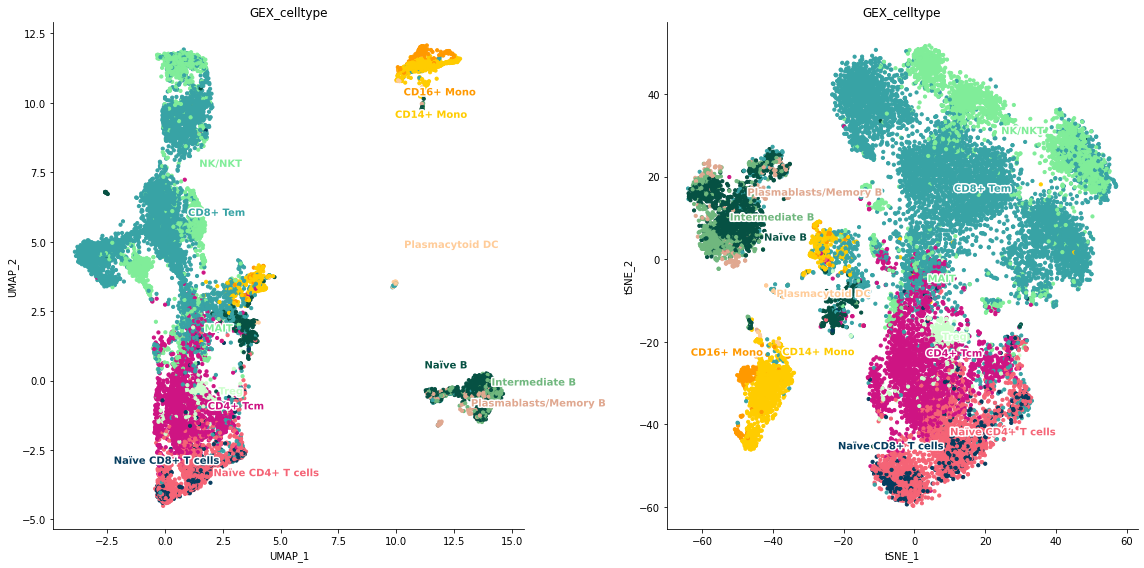

In [24]:

from scenicplus.dimensionality_reduction import plot_metadata_given_ax
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#specify color_dictionary

color_dict = {
    'Naïve B': "#065143",
    ' Intermediate B': "#70B77E",
    'Plasmablasts/Memory B': "#E0A890",
    'Naïve CD4+ T cells': "#F56476",
    'CD4+ Tcm': "#CE1483",
    'Treg': "#CCFFCC",
    'Naïve CD8+ T cells': "#053C5E" ,
    'CD8+ Tem': "#38A3A5",
    'MAIT': "#80ED99",
    'CD14+ Mono': "#FFCC00",
    'CD16+ Mono': "#FF9900",
    'Plasmacytoid DC': "#FFCC99",
    'NK/NKT': "#80ED99",
}

fig, axs = plt.subplots(ncols=2, figsize = (16, 8))
plot_metadata_given_ax(
    scplus_obj=scplus_obj_day0,
    ax = axs[0],
    reduction_name = 'eRegulons_UMAP',
    variable = 'GEX_celltype', #note the GEX_ prefix, this metadata originated from the gene expression metadata (on which we did the cell type annotation before)
    color_dictionary={'GEX_celltype': color_dict}
)
plot_metadata_given_ax(
    scplus_obj=scplus_obj_day0,
    ax = axs[1],
    reduction_name = 'eRegulons_tSNE',
    variable = 'GEX_celltype', #note the GEX_ prefix, this metadata originated from the gene expression metadata (on which we did the cell type annotation before)
    color_dictionary={'GEX_celltype': color_dict}
)
fig.tight_layout()
sns.despine(ax = axs[0]) #remove top and right edge of axis border
sns.despine(ax = axs[1]) #remove top and right edge of axis border
plt.show()

TypeError: sort_values() missing 1 required positional argument: 'by'

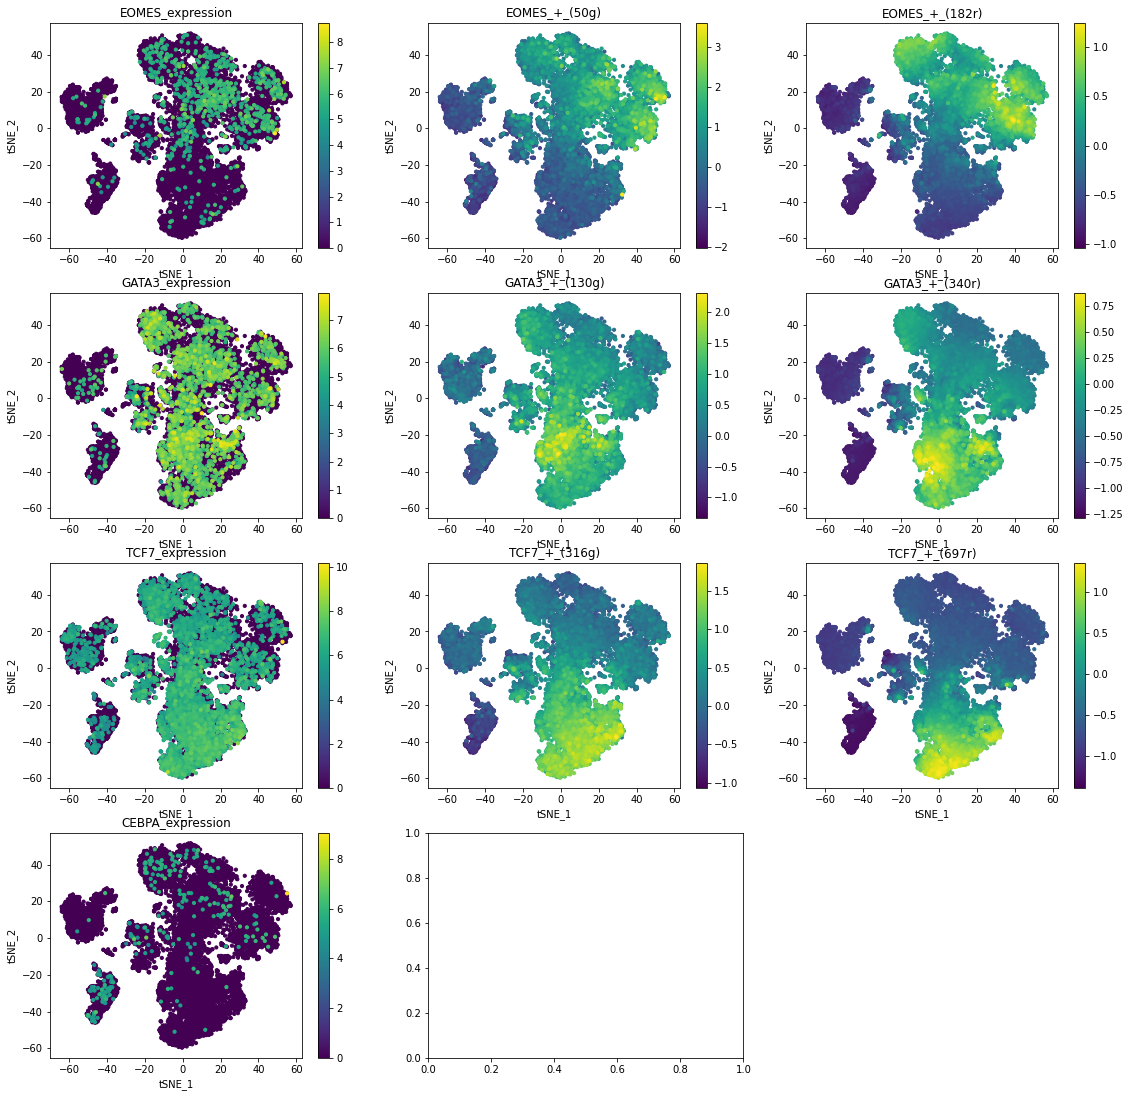

In [25]:
from scenicplus.dimensionality_reduction import plot_eRegulon
plot_eRegulon(
    scplus_obj = scplus_obj_day0,
    reduction_name = 'eRegulons_tSNE',
    selected_regulons = ['EOMES_+', 'GATA3_+', 'TCF7_+', 'CEBPA_+', 'PAX5_+'],
    scale = True,
    auc_key = 'eRegulon_AUC_filtered')

In [26]:
from scenicplus.cistromes import TF_cistrome_correlation, generate_pseudobulks

generate_pseudobulks(
        scplus_obj = scplus_obj_day0,
        variable = 'GEX_celltype',
        auc_key = 'eRegulon_AUC_filtered',
        signature_key = 'Gene_based')
generate_pseudobulks(
        scplus_obj = scplus_obj_day0,
        variable = 'GEX_celltype',
        auc_key = 'eRegulon_AUC_filtered',
        signature_key = 'Region_based')

TF_cistrome_correlation(
            scplus_obj_day0,
            use_pseudobulk = True,
            variable = 'GEX_celltype',
            auc_key = 'eRegulon_AUC_filtered',
            signature_key = 'Gene_based',
            out_key = 'filtered_gene_based')
TF_cistrome_correlation(
            scplus_obj_day0,
            use_pseudobulk = True,
            variable = 'GEX_celltype',
            auc_key = 'eRegulon_AUC_filtered',
            signature_key = 'Region_based',
            out_key = 'filtered_region_based')

scplus_obj_day0.uns['TF_cistrome_correlation']['filtered_region_based'].head()

/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient 

TF         Cistrome       Rho        P-value  Adjusted_p-value
0     PAX5     PAX5_-_(53r) -0.721329  2.675294e-209     1.866761e-208
1  ZNF385D  ZNF385D_+_(44r)  0.177635   1.119193e-10      1.554984e-10
2   POU2F2  POU2F2_+_(567r)  0.761640  7.730769e-247     6.935604e-246
3    BATF3   BATF3_+_(117r)  0.247370   1.410277e-19      2.259322e-19
4    PHF20   PHF20_+_(702r)  0.362001   1.561710e-41      3.008448e-41

/tmp/ipykernel_1964255/3616166477.py:12: RuntimeWarning: divide by zero encountered in log10
  sc = ax.scatter(rho, n_targets, c = -np.log10(adj_pval), s = 5)


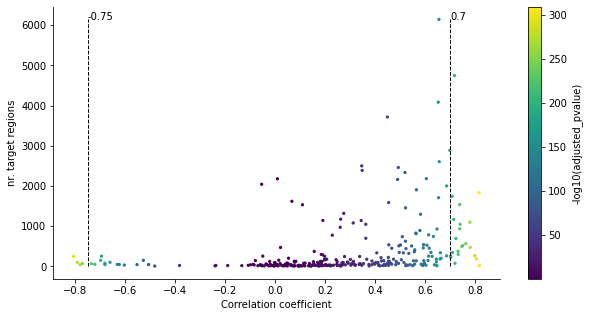

In [27]:
import numpy as np
n_targets = [int(x.split('(')[1].replace('r)', '')) for x in scplus_obj_day0.uns['TF_cistrome_correlation']['filtered_region_based']['Cistrome']]
rho = scplus_obj_day0.uns['TF_cistrome_correlation']['filtered_region_based']['Rho'].to_list()
adj_pval = scplus_obj_day0.uns['TF_cistrome_correlation']['filtered_region_based']['Adjusted_p-value'].to_list()

thresholds = {
        'rho': [-0.75, 0.70],
        'n_targets': 0
}
import seaborn as sns
fig, ax = plt.subplots(figsize = (10, 5))
sc = ax.scatter(rho, n_targets, c = -np.log10(adj_pval), s = 5)
ax.set_xlabel('Correlation coefficient')
ax.set_ylabel('nr. target regions')
#ax.hlines(y = thresholds['n_targets'], xmin = min(rho), xmax = max(rho), color = 'black', ls = 'dashed', lw = 1)
ax.vlines(x = thresholds['rho'], ymin = 0, ymax = max(n_targets), color = 'black', ls = 'dashed', lw = 1)
ax.text(x = thresholds['rho'][0], y = max(n_targets), s = str(thresholds['rho'][0]))
ax.text(x = thresholds['rho'][1], y = max(n_targets), s = str(thresholds['rho'][1]))
sns.despine(ax = ax)
fig.colorbar(sc, label = '-log10(adjusted_pvalue)', ax = ax)
plt.show()

In [28]:
selected_cistromes = scplus_obj_day0.uns['TF_cistrome_correlation']['filtered_region_based'].loc[
        np.logical_or(
                scplus_obj_day0.uns['TF_cistrome_correlation']['filtered_region_based']['Rho'] > thresholds['rho'][1],
                scplus_obj_day0.uns['TF_cistrome_correlation']['filtered_region_based']['Rho'] < thresholds['rho'][0]
        )]['Cistrome'].to_list()
selected_eRegulons = [x.split('_(')[0] for x in selected_cistromes]
selected_eRegulons_gene_sig = [
        x for x in scplus_obj_day0.uns['eRegulon_signatures_filtered']['Gene_based'].keys()
        if x.split('_(')[0] in selected_eRegulons]
selected_eRegulons_region_sig = [
        x for x in scplus_obj_day0.uns['eRegulon_signatures_filtered']['Region_based'].keys()
        if x.split('_(')[0] in selected_eRegulons]
#save the results in the scenicplus object
scplus_obj_day0.uns['selected_eRegulon'] = {'Gene_based': selected_eRegulons_gene_sig, 'Region_based': selected_eRegulons_region_sig}
print(f'selected: {len(selected_eRegulons_gene_sig)} eRegulons')

selected: 50 eRegulons


In [29]:
dill.dump(scplus_obj_day0, open(os.path.join(work_dir, 'scenicplus/scplus_obj_day0_filter.pkl'), 'wb'), protocol=-1)

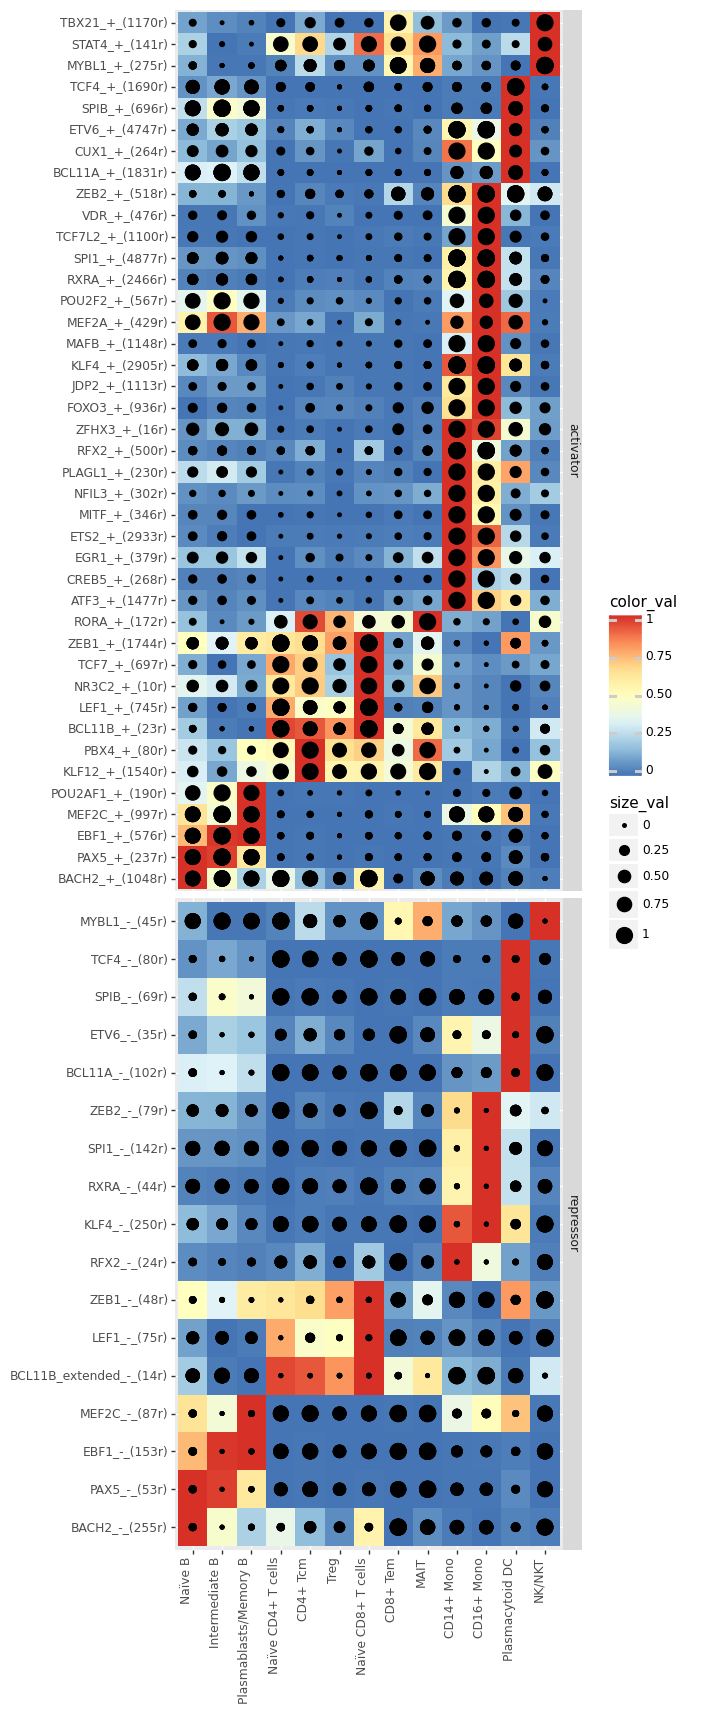

<ggplot: (8738645738912)>

In [30]:
from scenicplus.plotting.dotplot import heatmap_dotplot
heatmap_dotplot(
        scplus_obj = scplus_obj_day0,
        size_matrix = scplus_obj_day0.uns['eRegulon_AUC_filtered']['Region_based'], #specify what to plot as dot sizes, target region enrichment in this case
        color_matrix = scplus_obj_day0.to_df('EXP'), #specify  what to plot as colors, TF expression in this case
        scale_size_matrix = True,
        scale_color_matrix = True,
        group_variable = 'GEX_celltype',
        subset_eRegulons = scplus_obj_day0.uns['selected_eRegulon']['Gene_based'],
        index_order = ['Naïve B',' Intermediate B', 'Plasmablasts/Memory B','Naïve CD4+ T cells', 'CD4+ Tcm','Treg','Naïve CD8+ T cells','CD8+ Tem','MAIT','CD14+ Mono','CD16+ Mono','Plasmacytoid DC','NK/NKT'],
        figsize = (5, 20),
        orientation = 'vertical')




In [31]:
from scenicplus.RSS import *
regulon_specificity_scores(
        scplus_obj_day0,
        variable = 'GEX_celltype',
        auc_key = 'eRegulon_AUC_filtered',
        signature_keys = ['Region_based'],
        selected_regulons = [x for x in scplus_obj_day0.uns['selected_eRegulon']['Region_based'] if '-' not in x],
        out_key_suffix = '_filtered')

/usr/local/lib/python3.8/dist-packages/adjustText/__init__.py:422: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/Reference/scenicplus/src/scenicplus/RSS.py:172: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


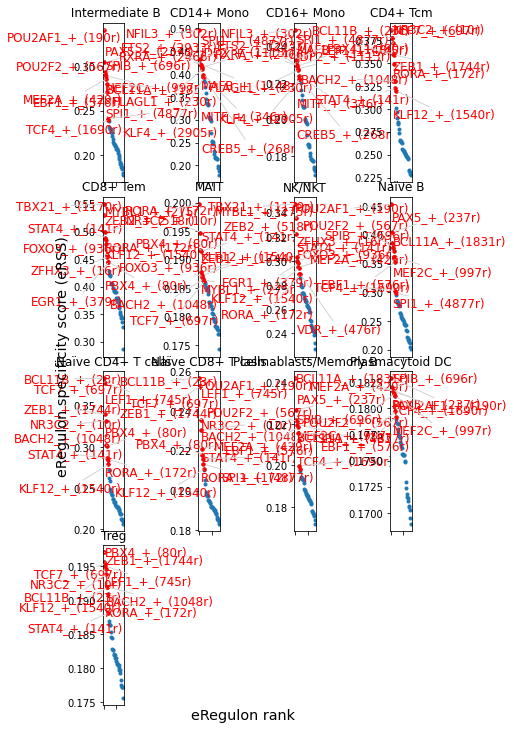

In [33]:
plot_rss(scplus_obj_day0, 'GEX_celltype_filtered', num_columns=4, top_n=10, figsize = (5, 10))

In [44]:
flat_list = lambda t: [item for sublist in t for item in sublist]
selected_markers = list(set(flat_list(
    [scplus_obj_day0.uns['RSS']['GEX_celltype_filtered'].loc[celltype].sort_values(ascending = False).head(10).index.to_list()
    for celltype in scplus_obj_day0.uns['RSS']['GEX_celltype_filtered'].index])))


selected_markers

['VDR_+_(476r)',
 'FOXO3_+_(936r)',
 'ZEB1_+_(1744r)',
 'TCF7_+_(697r)',
 'PAX5_+_(237r)',
 'EBF1_+_(576r)',
 'SPI1_+_(4877r)',
 'BACH2_+_(1048r)',
 'KLF12_+_(1540r)',
 'PLAGL1_+_(230r)',
 'STAT4_+_(141r)',
 'TBX21_+_(1170r)',
 'NFIL3_+_(302r)',
 'SPIB_+_(696r)',
 'JDP2_+_(1113r)',
 'MEF2C_+_(997r)',
 'MAFB_+_(1148r)',
 'EGR1_+_(379r)',
 'RXRA_+_(2466r)',
 'NR3C2_+_(10r)',
 'POU2AF1_+_(190r)',
 'MYBL1_+_(275r)',
 'ETS2_+_(2933r)',
 'PBX4_+_(80r)',
 'ZEB2_+_(518r)',
 'KLF4_+_(2905r)',
 'ZFHX3_+_(16r)',
 'BCL11A_+_(1831r)',
 'CREB5_+_(268r)',
 'MEF2A_+_(429r)',
 'POU2F2_+_(567r)',
 'LEF1_+_(745r)',
 'BCL11B_+_(23r)',
 'RORA_+_(172r)',
 'TCF4_+_(1690r)',
 'MITF_+_(346r)']

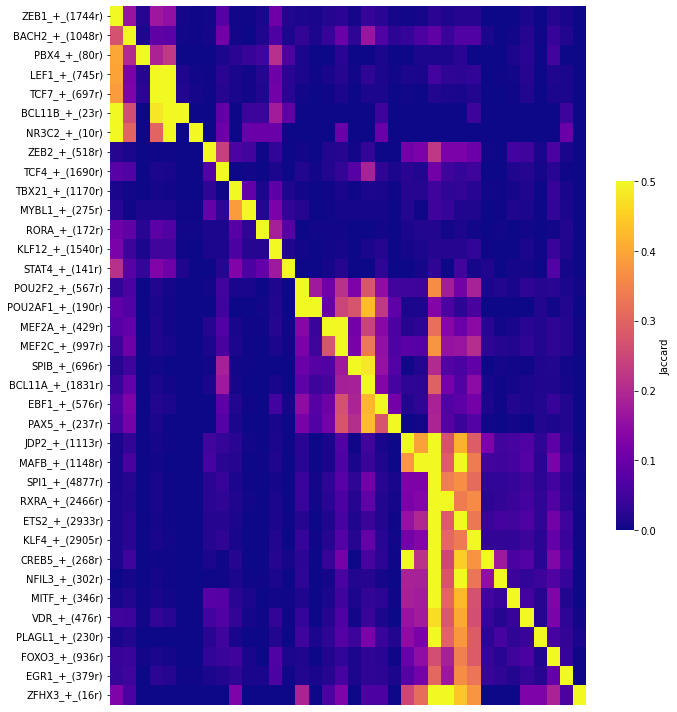

In [35]:
from scenicplus.plotting.correlation_plot import *

region_intersetc_data, Z = jaccard_heatmap(
        scplus_obj_day0,
        method = 'intersect',
        gene_or_region_based = 'Region_based',
        use_plotly = False,
        selected_regulons = selected_markers,
        signature_key = 'eRegulon_signatures_filtered',
        figsize = (10, 10), return_data = True, vmax = 0.5, cmap = 'plasma')

In [36]:
from pycisTopic.diff_features import find_highly_variable_features
hvr = find_highly_variable_features(scplus_obj_day0.to_df('ACC').loc[list(set(scplus_obj_day0.uns['eRegulon_metadata_filtered']['Region']))], n_top_features=1000, plot = False)
hvg = find_highly_variable_features(scplus_obj_day0.to_df('EXP')[list(set(scplus_obj_day0.uns['eRegulon_metadata_filtered']['Gene']))].T, n_top_features=1000, plot = False)

2023-03-08 22:27:13,857 cisTopic     INFO     Calculating mean
2023-03-08 22:27:14,093 cisTopic     INFO     Calculating variance
2023-03-08 22:27:15,914 cisTopic     INFO     Done!
2023-03-08 22:27:16,810 cisTopic     INFO     Calculating mean
2023-03-08 22:27:16,837 cisTopic     INFO     Calculating variance
2023-03-08 22:27:17,045 cisTopic     INFO     Done!


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [45]:
from scenicplus.networks import create_nx_tables, create_nx_graph, plot_networkx, export_to_cytoscape
nx_tables = create_nx_tables(
    scplus_obj = scplus_obj_day0,
    eRegulon_metadata_key ='eRegulon_metadata_filtered',
    subset_eRegulons = ['BACH2', 'PBX4','BCL11B'],
    subset_regions = hvr,
    subset_genes = hvg,
    add_differential_gene_expression = True,
    add_differential_region_accessibility = True,
    differential_variable = ['GEX_celltype'])

/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
... storing 'GEX_celltype' as categorical
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
... storing 'GEX_celltype' as categorical
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
... storing 'GEX_celltype' as categorical


In [48]:
G, pos, edge_tables, node_tables = create_nx_graph(nx_tables,
                   use_edge_tables = ['TF2R','R2G'],
                   color_edge_by = {'TF2R': {'variable' : 'TF', 'category_color' : {'BCL11B': 'Orange', 'PBX4': 'Purple','BACH2': 'Red'}},
                                    'R2G': {'variable' : 'R2G_rho', 'continuous_color' : 'viridis', 'v_min': -1, 'v_max': 1}},
                   transparency_edge_by =  {'R2G': {'variable' : 'R2G_importance', 'min_alpha': 0.1, 'v_min': 0}},
                   width_edge_by = {'R2G': {'variable' : 'R2G_importance', 'max_size' :  1.5, 'min_size' : 1}},
                   color_node_by = {'TF': {'variable': 'TF', 'category_color' : {'BCL11B': 'Orange', 'PBX4': 'Purple','BACH2': 'Red'}},
                                    'Gene': {'variable': 'GEX_celltype_Log2FC_CD14+ Mono', 'continuous_color' : 'bwr'},
                                    'Region': {'variable': 'GEX_celltype_Log2FC_CD14+ Mono', 'continuous_color' : 'viridis'}},
                   transparency_node_by =  {'Region': {'variable' : 'GEX_celltype_Log2FC_CD14+ Mono', 'min_alpha': 0.1},
                                    'Gene': {'variable' : 'GEX_celltype_Log2FC_CD14+ Mono', 'min_alpha': 0.1}},
                   size_node_by = {'TF': {'variable': 'fixed_size', 'fixed_size': 30},
                                    'Gene': {'variable': 'fixed_size', 'fixed_size': 15},
                                    'Region': {'variable': 'fixed_size', 'fixed_size': 10}},
                   shape_node_by = {'TF': {'variable': 'fixed_shape', 'fixed_shape': 'ellipse'},
                                    'Gene': {'variable': 'fixed_shape', 'fixed_shape': 'ellipse'},
                                    'Region': {'variable': 'fixed_shape', 'fixed_shape': 'diamond'}},
                   label_size_by = {'TF': {'variable': 'fixed_label_size', 'fixed_label_size': 20.0},
                                    'Gene': {'variable': 'fixed_label_size', 'fixed_label_size': 10.0},
                                    'Region': {'variable': 'fixed_label_size', 'fixed_label_size': 0.0}},
                   layout='kamada_kawai_layout',
                   scale_position_by=250)

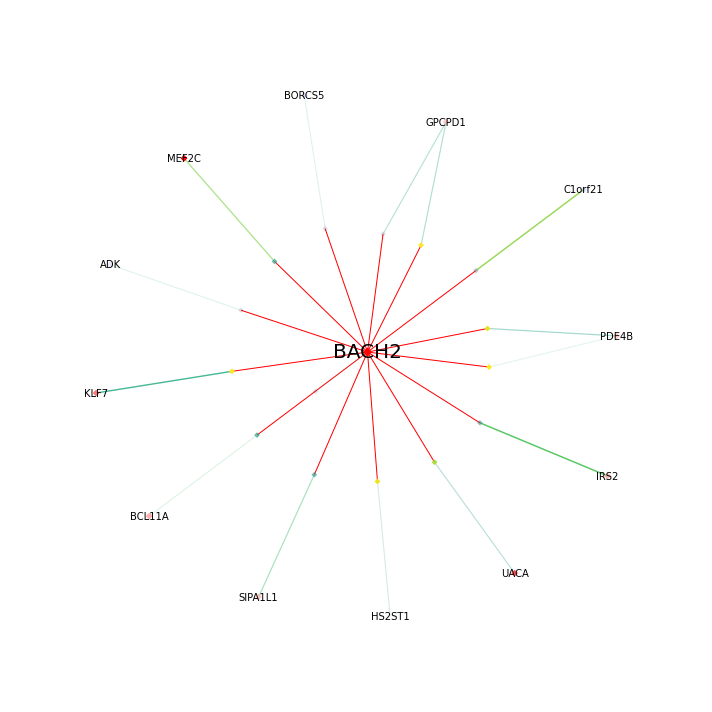

In [49]:
plt.figure(figsize=(10,10))
plot_networkx(G, pos)